In [1]:
import pandas as pd
import os

# Specify the folder path containing your files
folder_path = '/Users/mseglar/GitHub/sensors-analysis/stabilityElectronics/26092024_1R0/'

# Initialize an empty list to store individual DataFrames
dataframes = []


In [2]:
folder_path

'/Users/mseglar/GitHub/sensors-analysis/stabilityElectronics/26092024_1R0/'

In [3]:
# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)

        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date-Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames into one
final_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(final_df.head())


             Date-Time  Laser_Power   Total_Sum     Total_Sqr    V_Mean  \
0  2024-09-26-12:30:16           15  96482227.0  1.301824e+11  0.269333   
1  2024-09-26-12:30:33           15  96681333.0  1.306784e+11  0.270630   
2  2024-09-26-12:30:49           15  96472582.0  1.300834e+11  0.269055   
3  2024-09-26-12:31:05           15  96805534.0  1.307578e+11  0.268418   
4  2024-09-26-12:31:22           15  96759506.0  1.308592e+11  0.269807   

      Std_V  Temp  Humidity  Total_Counts  
0  0.001788  21.3      38.0       71507.0  
1  0.000850  21.3      38.0       71530.0  
2  0.001620  21.3      38.0       71547.0  
3  0.001401  21.3      38.0       71670.0  
4  0.001177  21.3      38.0       71547.0  


## VARIABILITY OF EACH PARAMETER TOGETHER

Laser_Power:
  Mean: 15.0
  Standard Deviation (σ): 0.0
  Standard Deviation as Percentage of Mean: 0.0%


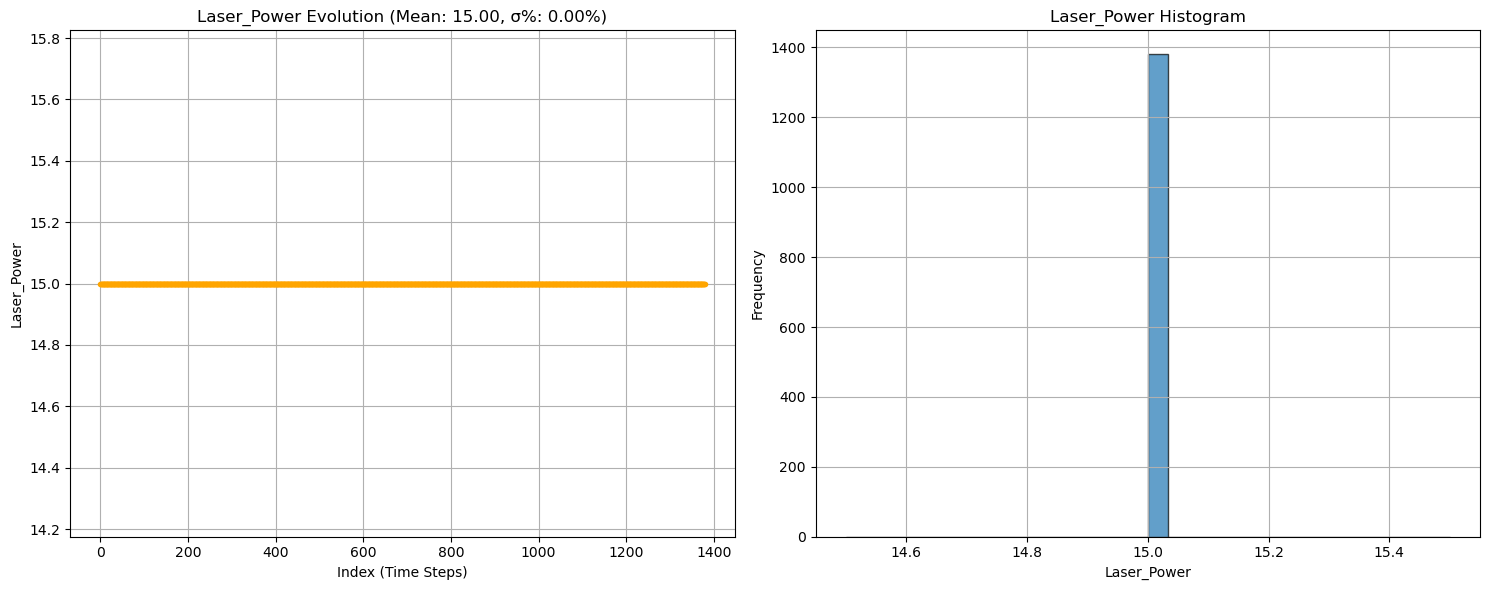

Total_Sum:
  Mean: 144720574.4347826
  Standard Deviation (σ): 67814988.90763377
  Standard Deviation as Percentage of Mean: 46.85925907390187%


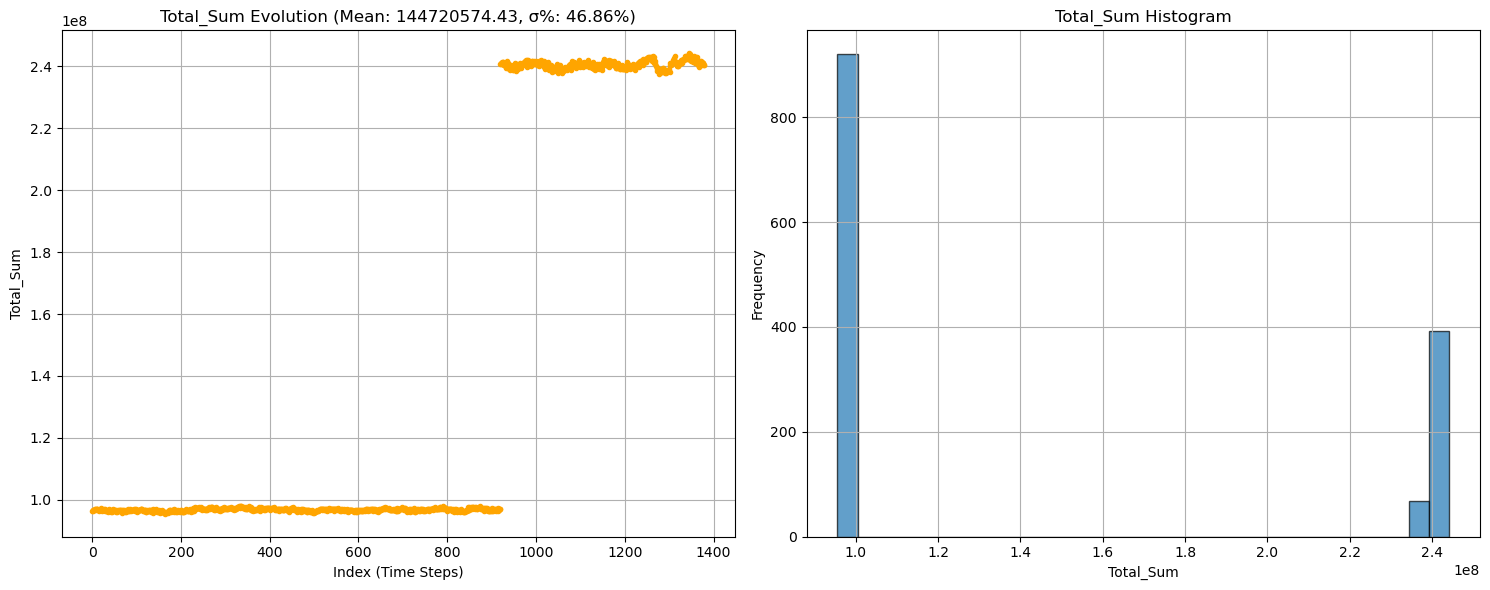

Total_Sqr:
  Mean: 356956862338.40436
  Standard Deviation (σ): 319776861563.748
  Standard Deviation as Percentage of Mean: 89.58417537315509%


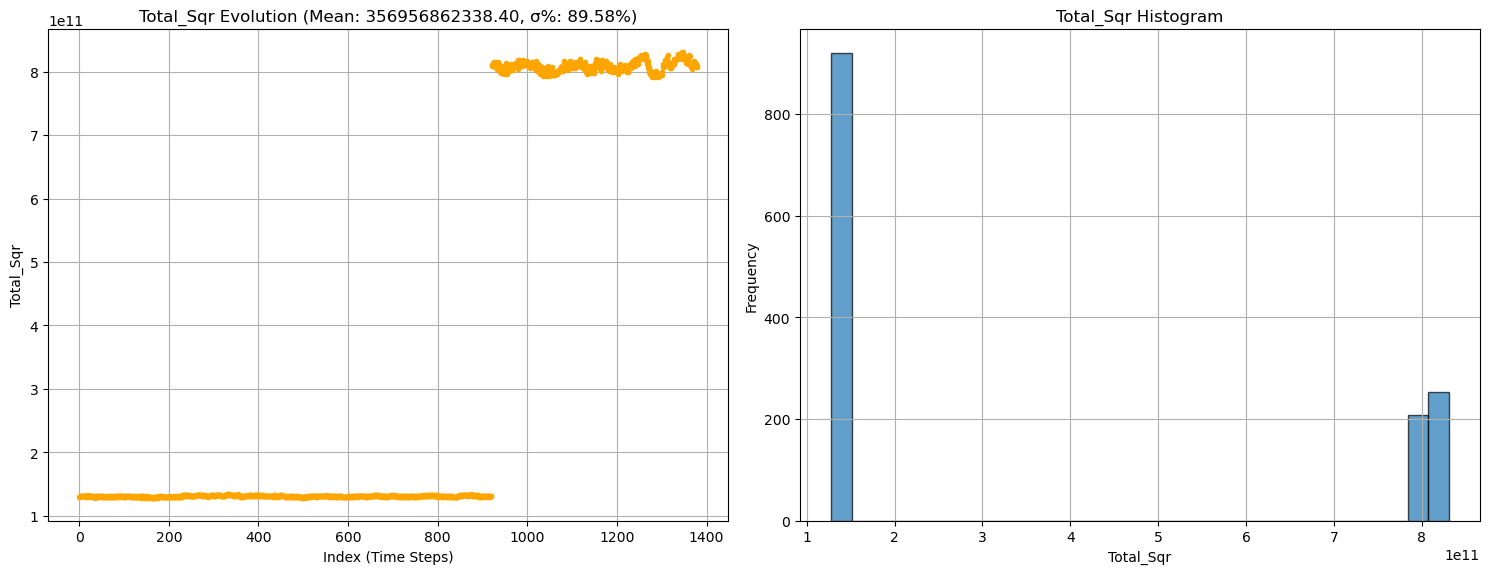

V_Mean:
  Mean: 0.2683360378391304
  Standard Deviation (σ): 0.0016247497581950078
  Standard Deviation as Percentage of Mean: 0.605490701613869%


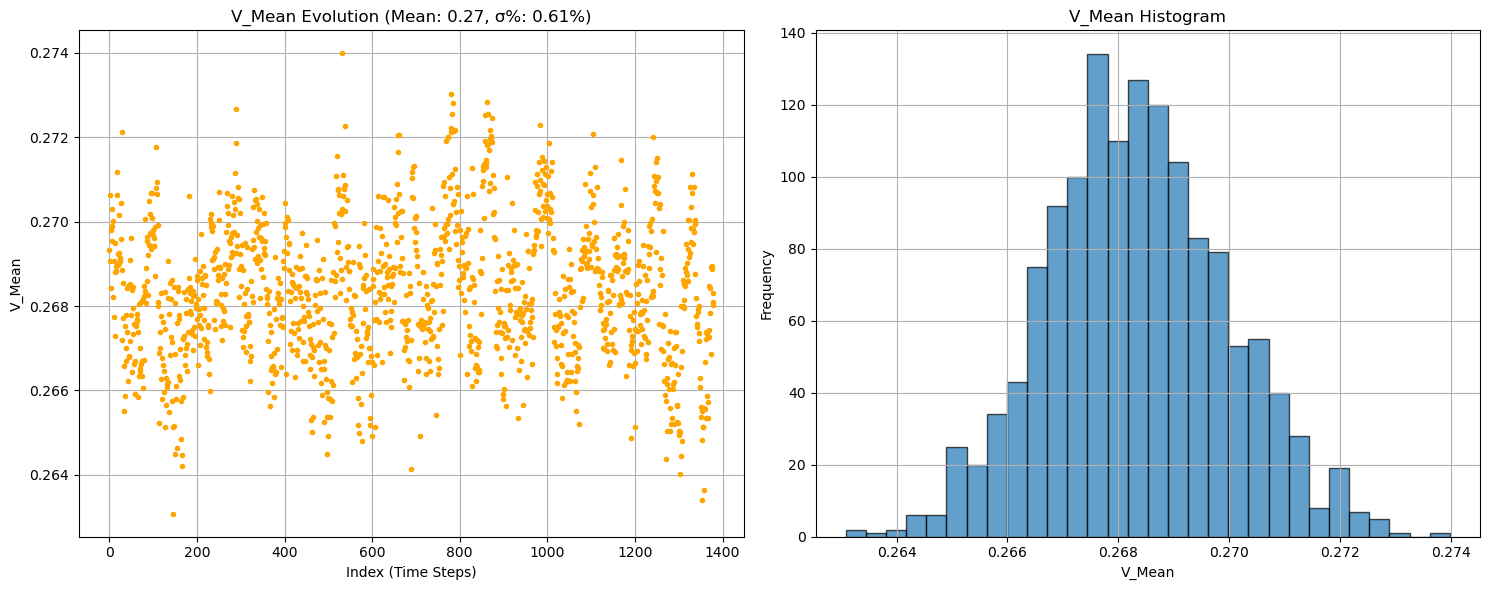

Std_V:
  Mean: 0.001854945765217391
  Standard Deviation (σ): 0.0006159271231465546
  Standard Deviation as Percentage of Mean: 33.20458930368624%


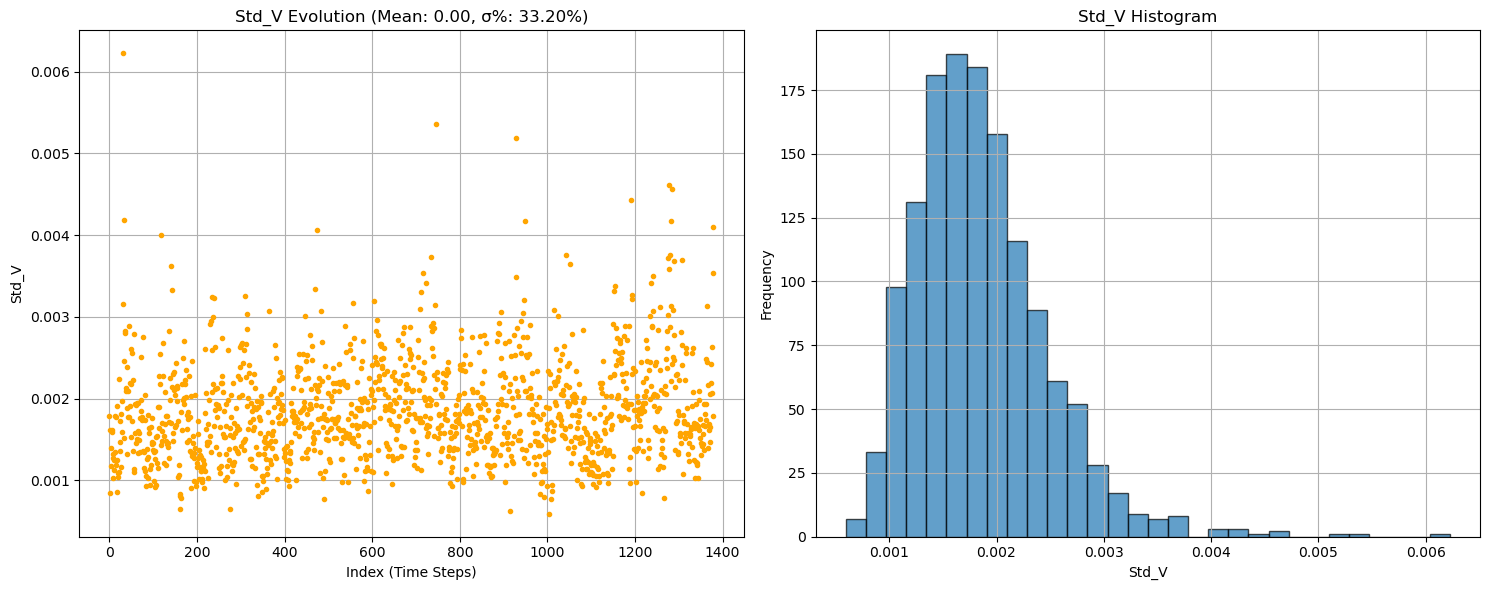

Temp:
  Mean: 21.221666666666668
  Standard Deviation (σ): 0.08858801610018979
  Standard Deviation as Percentage of Mean: 0.41744137014147387%


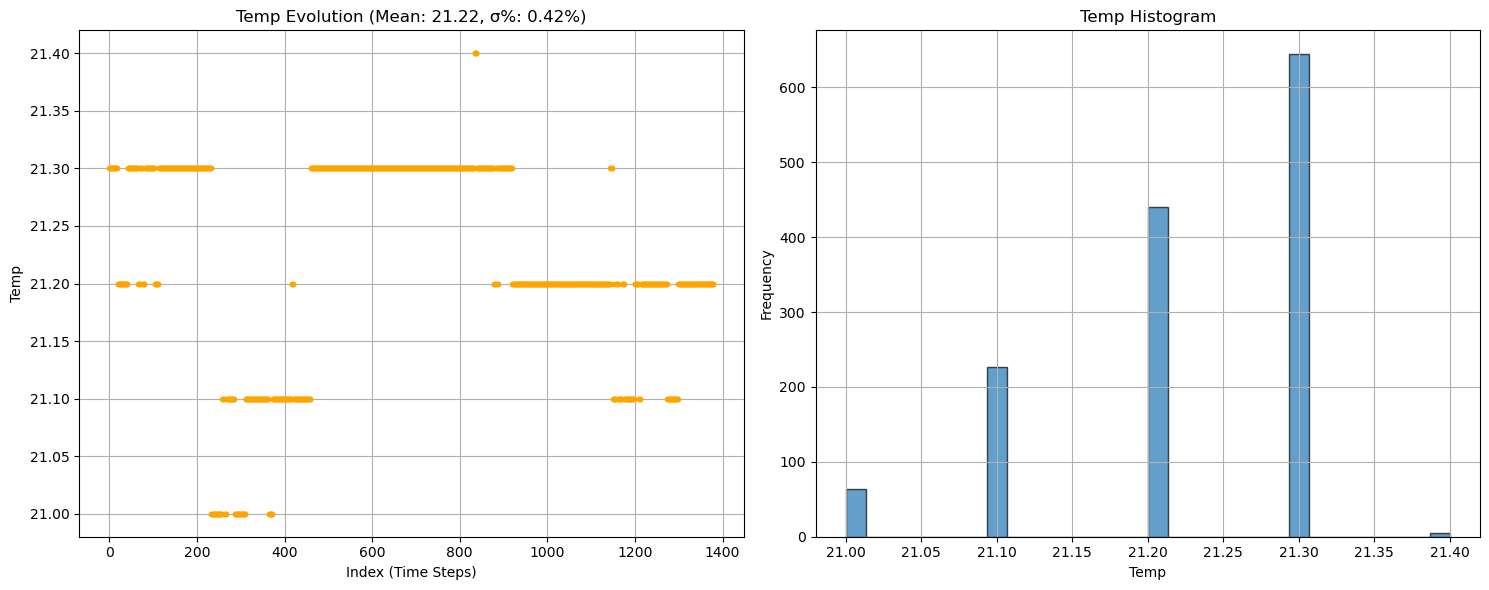

Humidity:
  Mean: 38.00797101449275
  Standard Deviation (σ): 0.5498449374931631
  Standard Deviation as Percentage of Mean: 1.446656905951393%


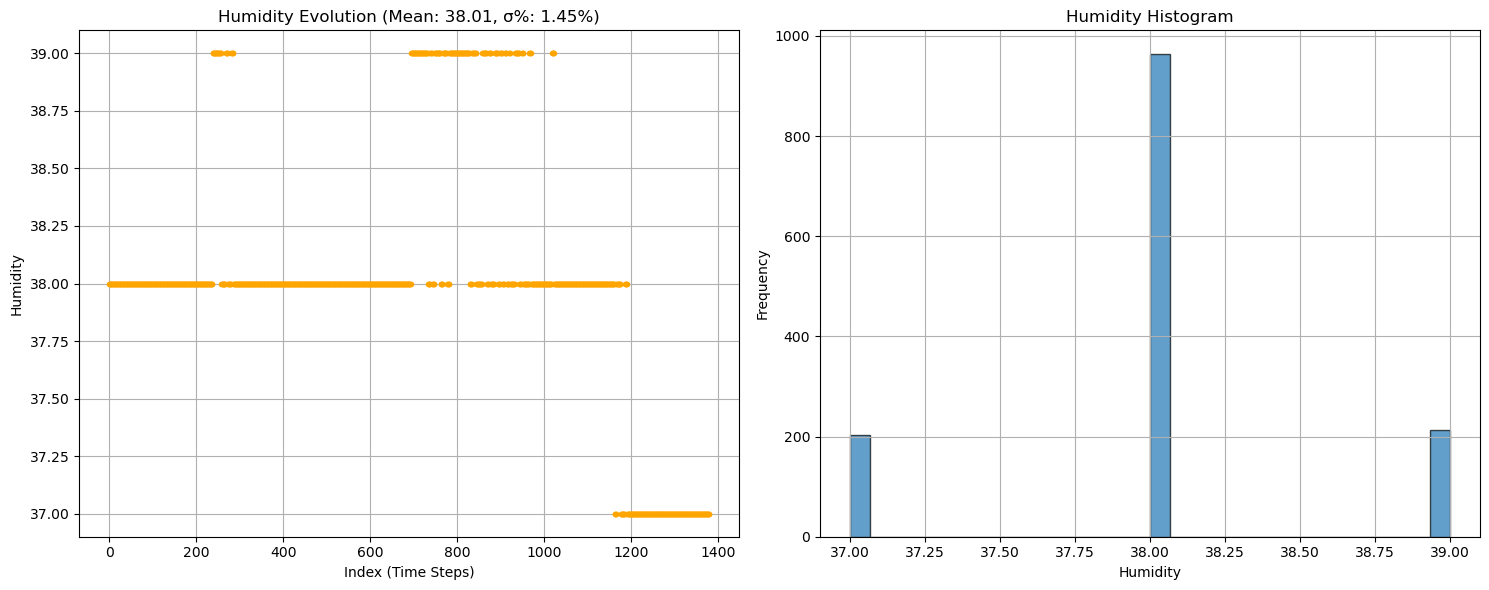

Total_Counts:
  Mean: 71547.04637681159
  Standard Deviation (σ): 97.97238452975051
  Standard Deviation as Percentage of Mean: 0.13693421250929985%


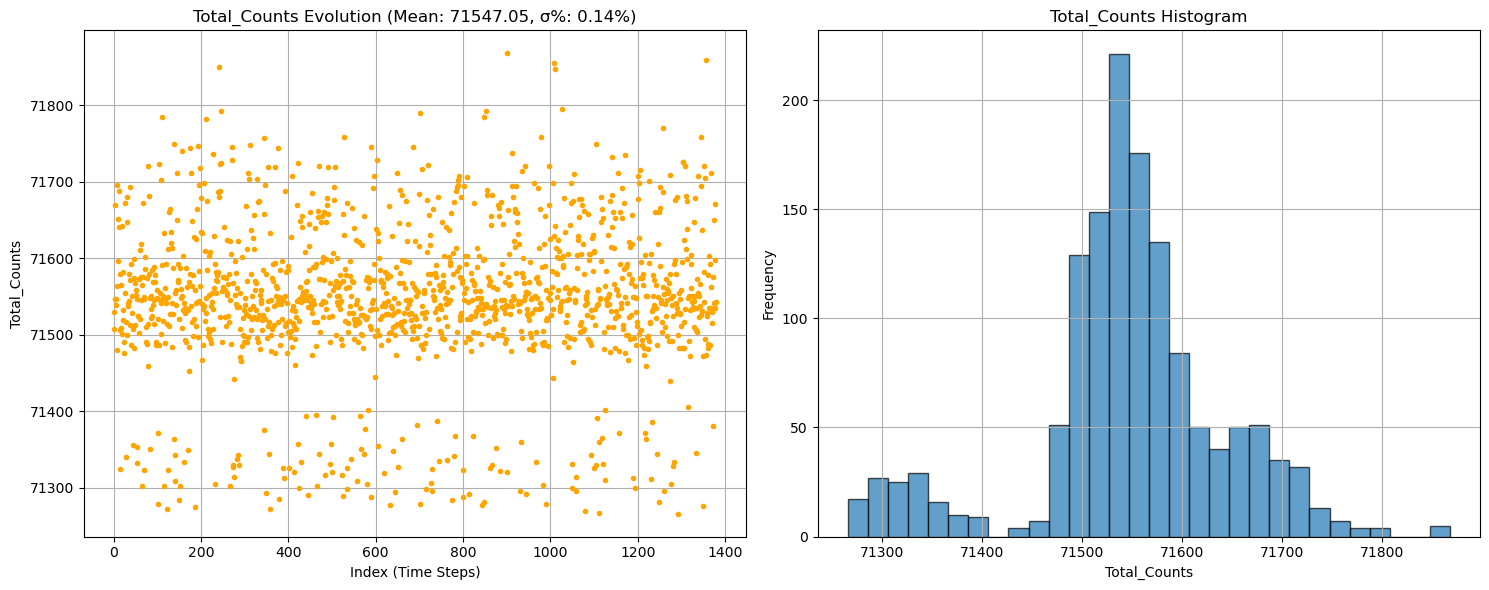

In [4]:
import matplotlib.pyplot as plt
# Plot each column except 'Date' and 'Time'
columns_to_plot = ['Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']

# Create a plot for each column
for column in columns_to_plot:
    # Calculate mean and variance
    mean_value = final_df[column].mean()
    std_dev = final_df[column].std()  # Standard deviation
    
    # Calculate sigma as a percentage of the mean
    sigma_percentage = (std_dev / mean_value) * 100 if mean_value != 0 else 0
    
    # Print mean and sigma (standard deviation)
    print(f'{column}:')
    print(f'  Mean: {mean_value}')
    print(f'  Standard Deviation (σ): {std_dev}')
    print(f'  Standard Deviation as Percentage of Mean: {sigma_percentage}%')
    
    
    # Create a subplot with 2 plots side by side (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size as necessary

    # Plot the evolution of values (line plot) on the left
    axs[0].plot(final_df[column], '.', color='orange')
    axs[0].set_title(f'{column} Evolution (Mean: {mean_value:.2f}, σ%: {sigma_percentage:.2f}%)')
    axs[0].set_xlabel('Index (Time Steps)')
    axs[0].set_ylabel(column)
    axs[0].grid(True)

    # Plot the histogram on the right
    axs[1].hist(final_df[column], bins=30, edgecolor='black', alpha=0.7)
    axs[1].set_title(f'{column} Histogram')
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    
    # Show the combined plots
    plt.show()


## PLOTS FOR EACH DATASET SEPARATELY, FOR EACH VARIABLE 


Analysis for file: ID_2_0.txt
Total_Sum:
  Mean: 96477865.16956522
  Standard Deviation (σ): 323203.1693792836
  Standard Deviation as Percentage of Mean: 0.3350024057966416%


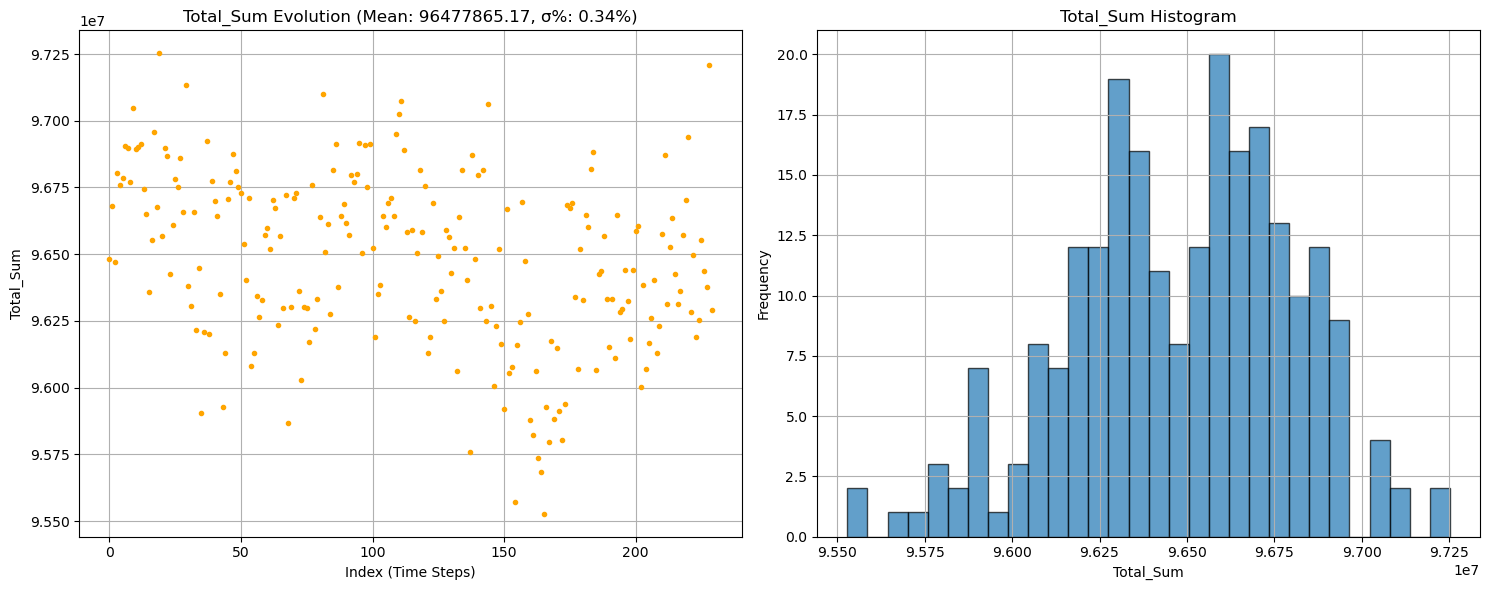

Total_Sqr:
  Mean: 130101590297.56956
  Standard Deviation (σ): 806619114.840846
  Standard Deviation as Percentage of Mean: 0.6199917410663%


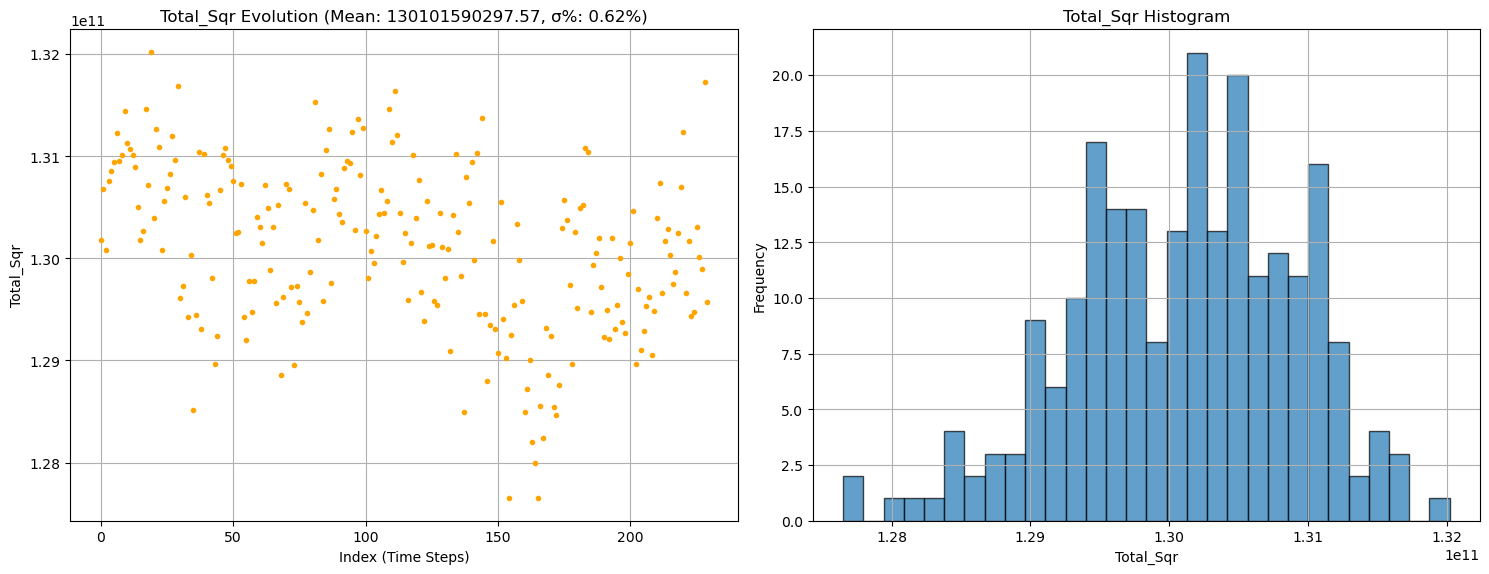

V_Mean:
  Mean: 0.26787783128260867
  Standard Deviation (σ): 0.0014879387287890496
  Standard Deviation as Percentage of Mean: 0.555454223914217%


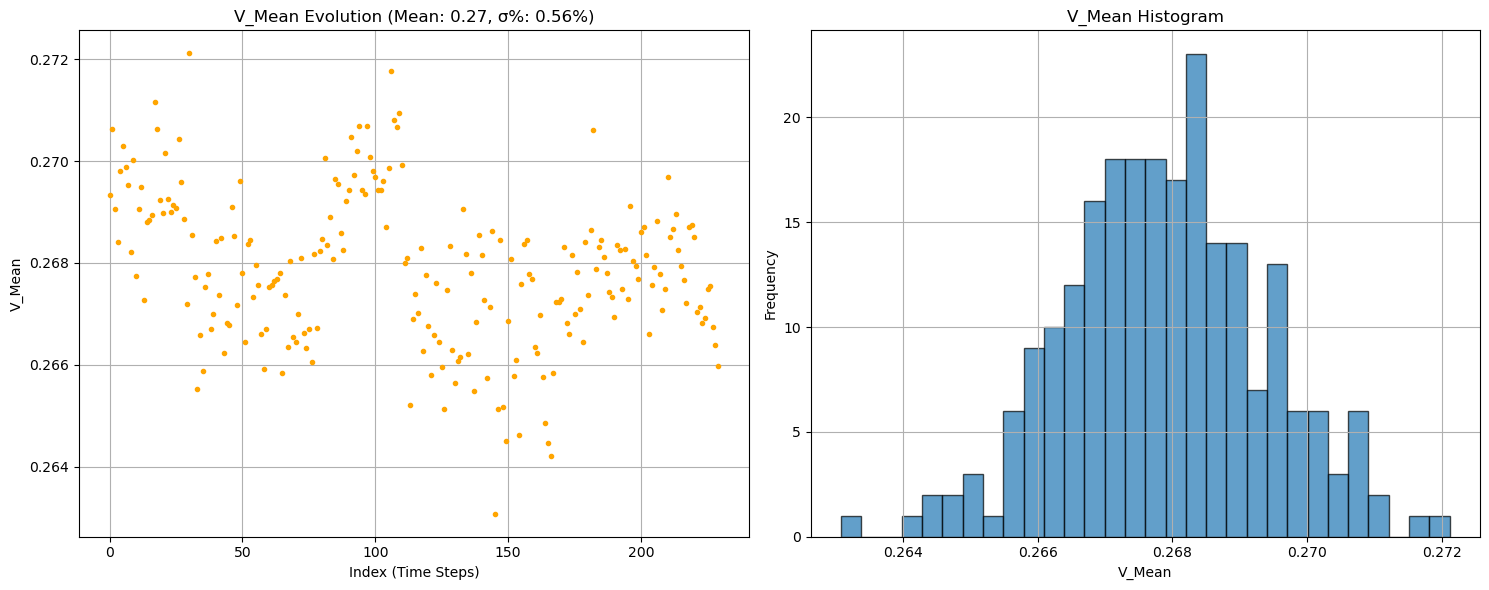

Std_V:
  Mean: 0.0016906194956521738
  Standard Deviation (σ): 0.000637030179807934
  Standard Deviation as Percentage of Mean: 37.68028118959986%


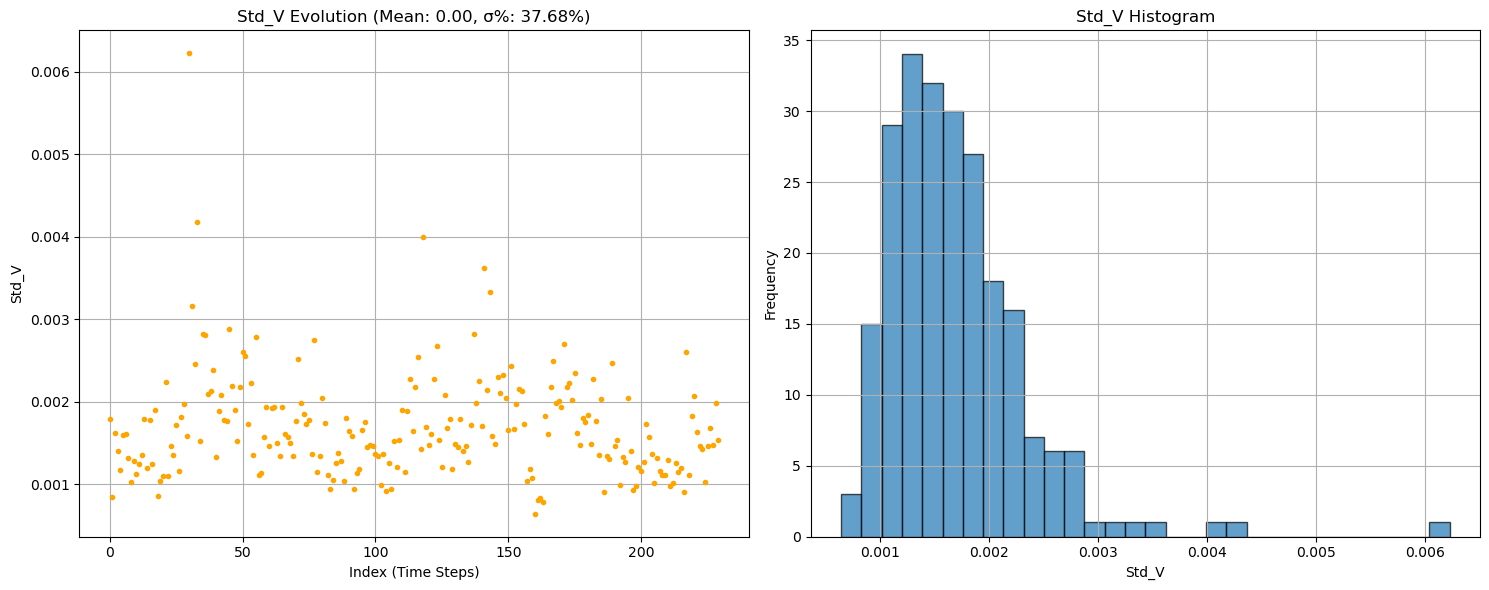

Total_Counts:
  Mean: 71546.50869565217
  Standard Deviation (σ): 96.53796417304196
  Standard Deviation as Percentage of Mean: 0.13493036338600334%


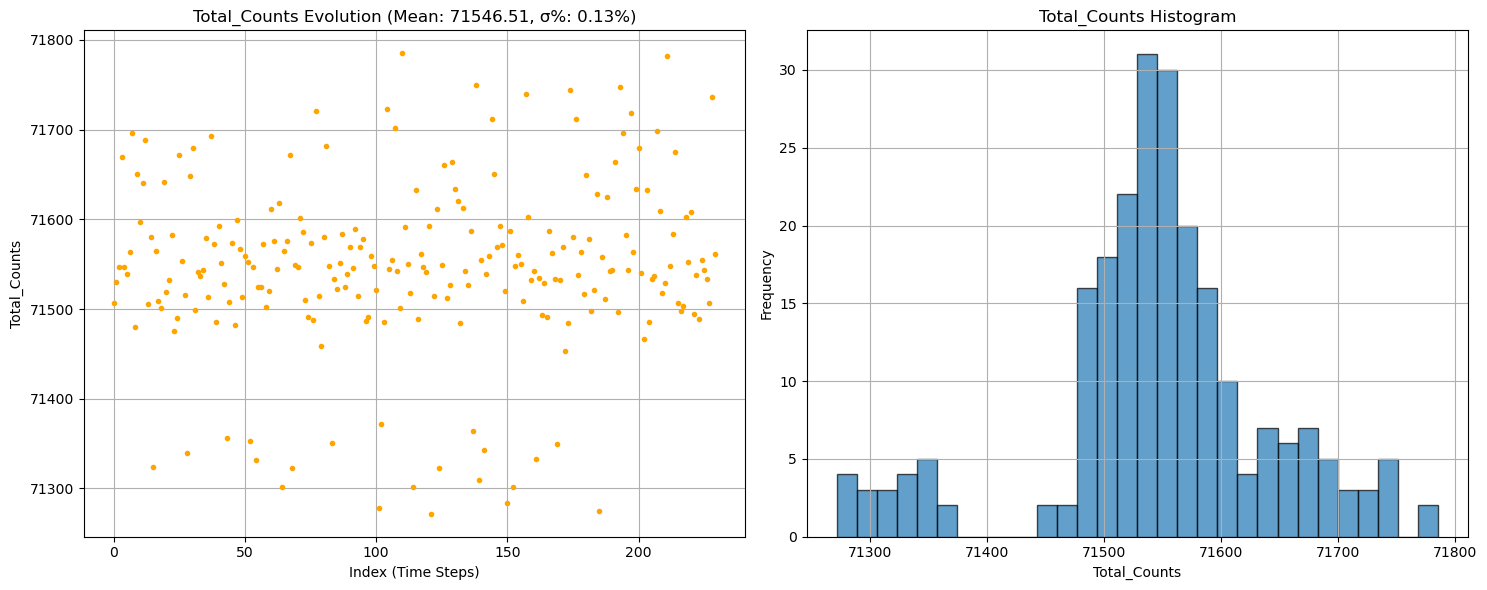


Analysis for file: ID_0_3.txt
Total_Sum:
  Mean: 97114594.75652175
  Standard Deviation (σ): 341124.5487791695
  Standard Deviation as Percentage of Mean: 0.35125981798555694%


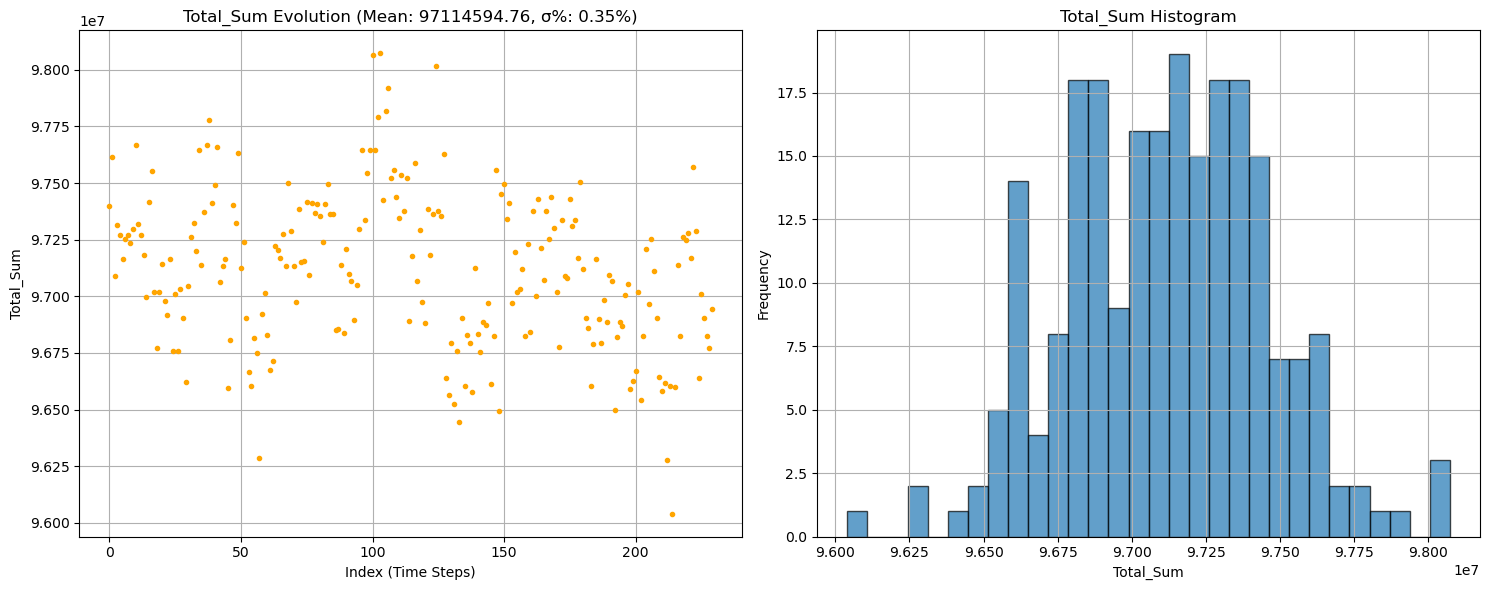

Total_Sqr:
  Mean: 131828760022.4
  Standard Deviation (σ): 857081438.8747674
  Standard Deviation as Percentage of Mean: 0.650147538920289%


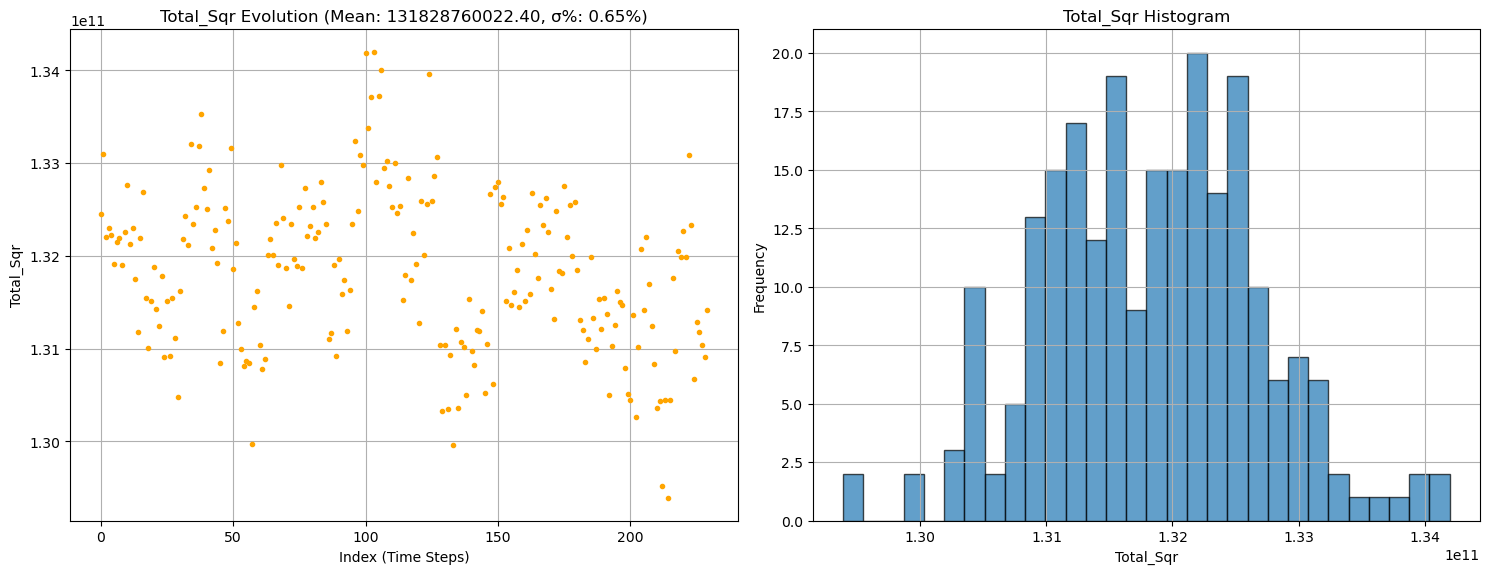

V_Mean:
  Mean: 0.2685797260521739
  Standard Deviation (σ): 0.0012351110519944542
  Standard Deviation as Percentage of Mean: 0.45986756712773%


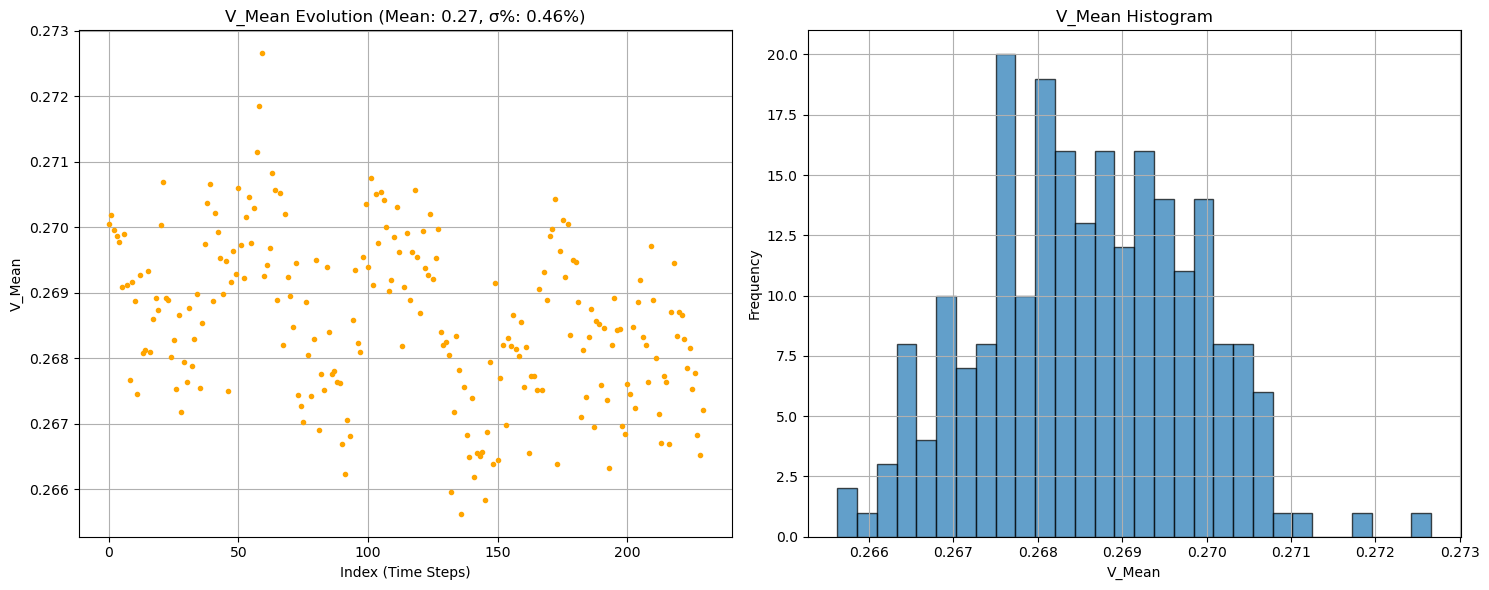

Std_V:
  Mean: 0.0017821617869565219
  Standard Deviation (σ): 0.0005242062286392751
  Standard Deviation as Percentage of Mean: 29.41406512449612%


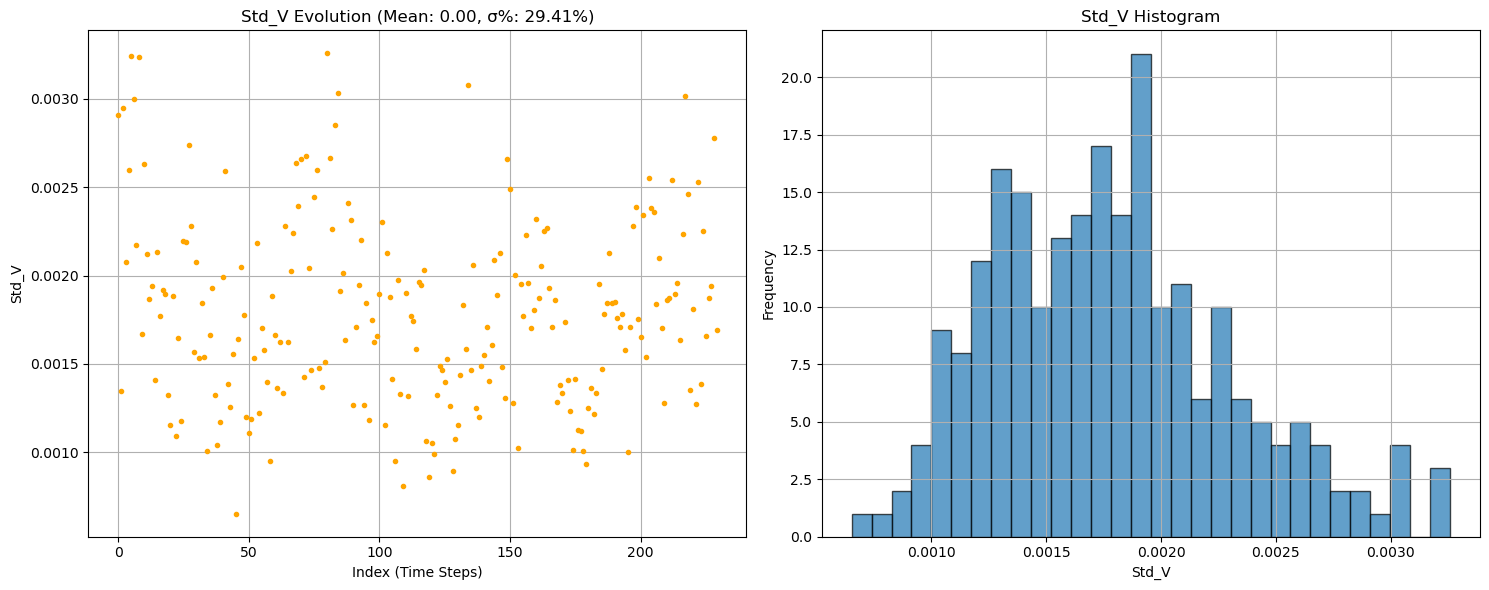

Total_Counts:
  Mean: 71544.98260869565
  Standard Deviation (σ): 99.201923017061
  Standard Deviation as Percentage of Mean: 0.13865671553745532%


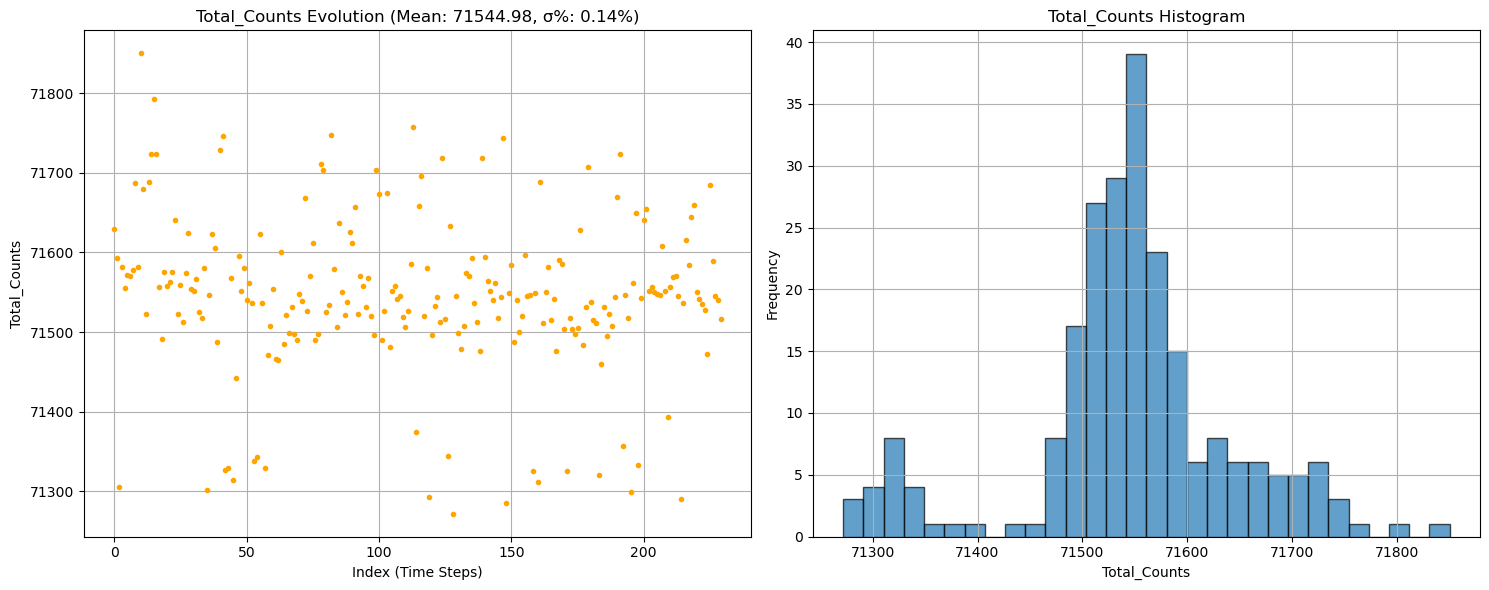


Analysis for file: ID_0_1.txt
Total_Sum:
  Mean: 96684057.31304348
  Standard Deviation (σ): 324065.4324677277
  Standard Deviation as Percentage of Mean: 0.3351798026208904%


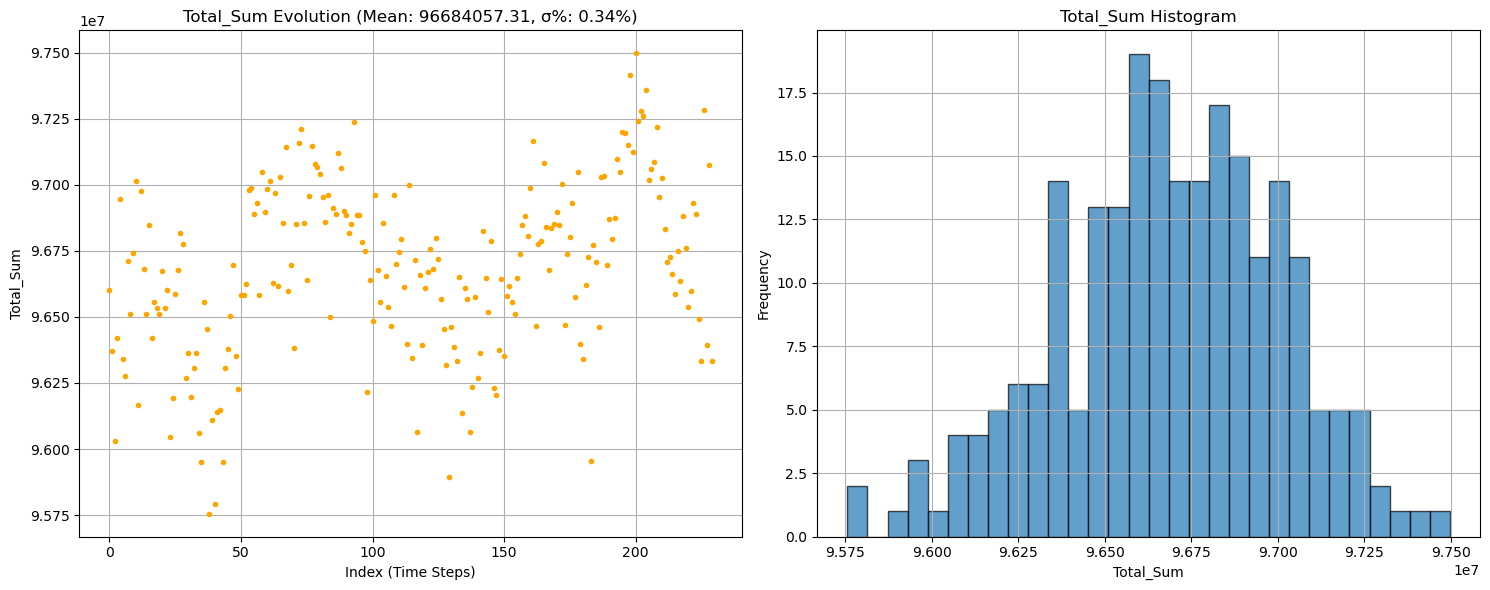

Total_Sqr:
  Mean: 130672844251.57391
  Standard Deviation (σ): 835148635.9170572
  Standard Deviation as Percentage of Mean: 0.6391141485442934%


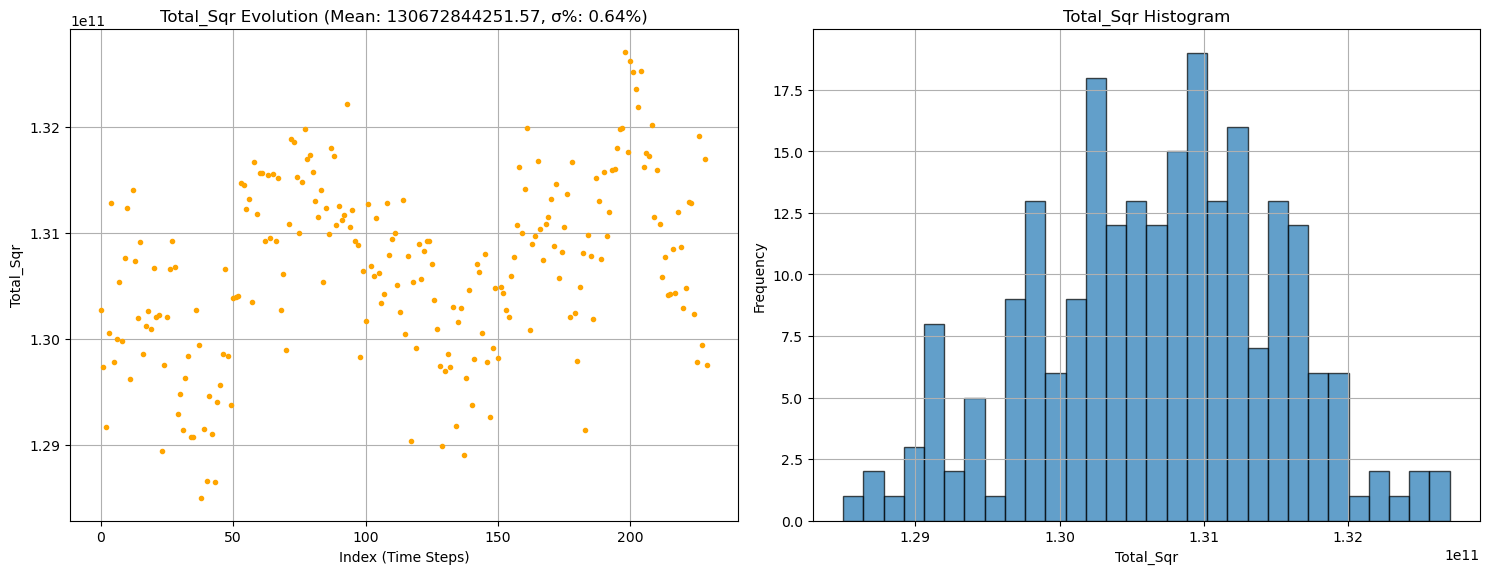

V_Mean:
  Mean: 0.26813296680869564
  Standard Deviation (σ): 0.0016550163417868005
  Standard Deviation as Percentage of Mean: 0.6172371720958886%


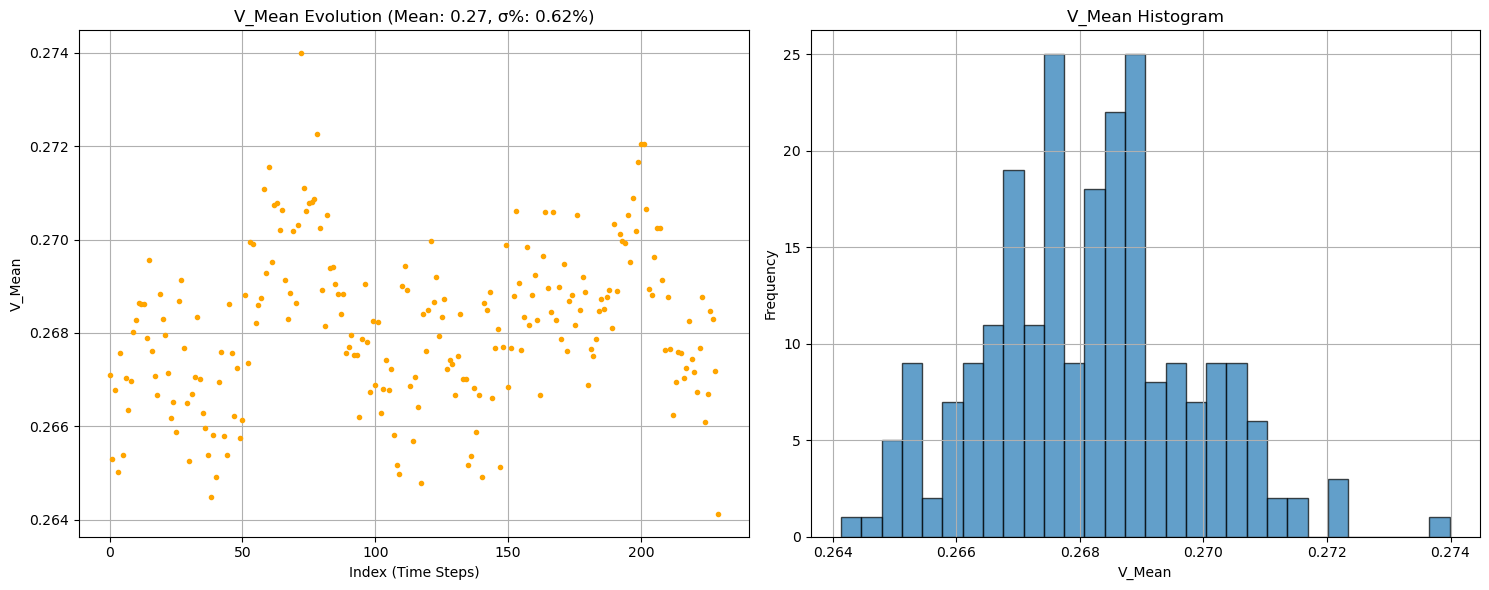

Std_V:
  Mean: 0.001918138160869565
  Standard Deviation (σ): 0.0005165625602773011
  Standard Deviation as Percentage of Mean: 26.93041464975201%


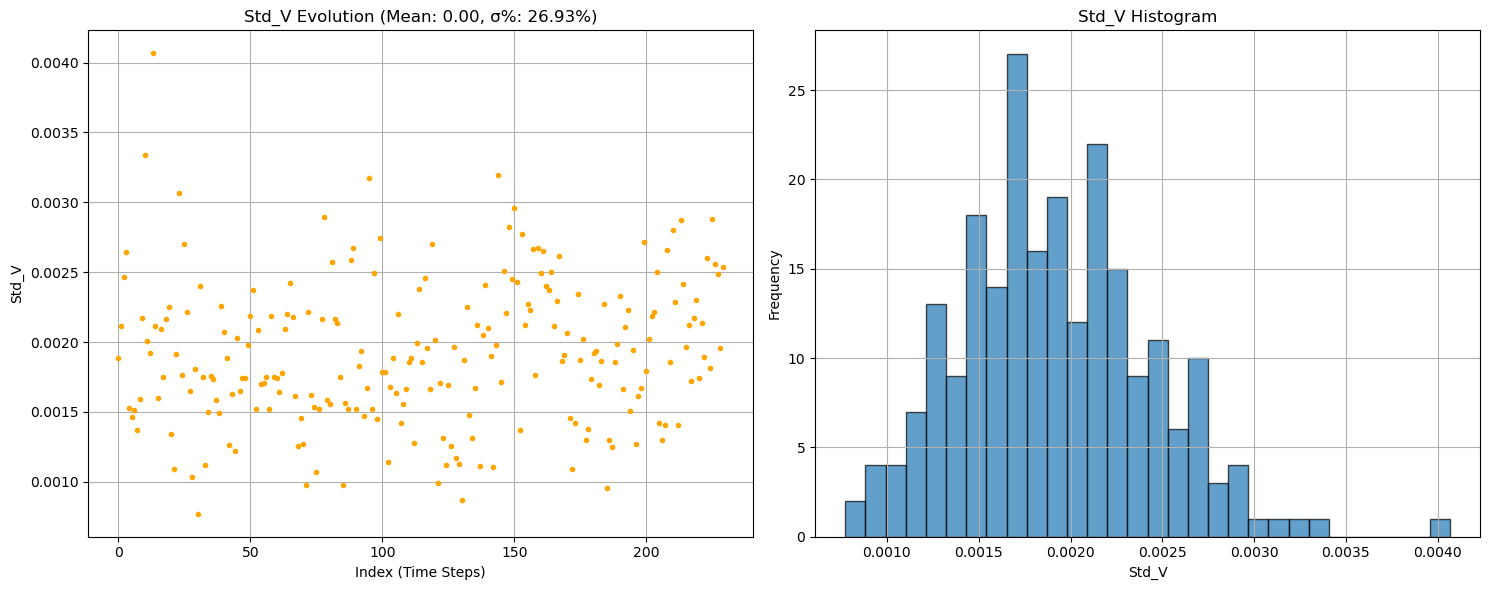

Total_Counts:
  Mean: 71539.07826086956
  Standard Deviation (σ): 96.6332505655592
  Standard Deviation as Percentage of Mean: 0.13507757286609554%


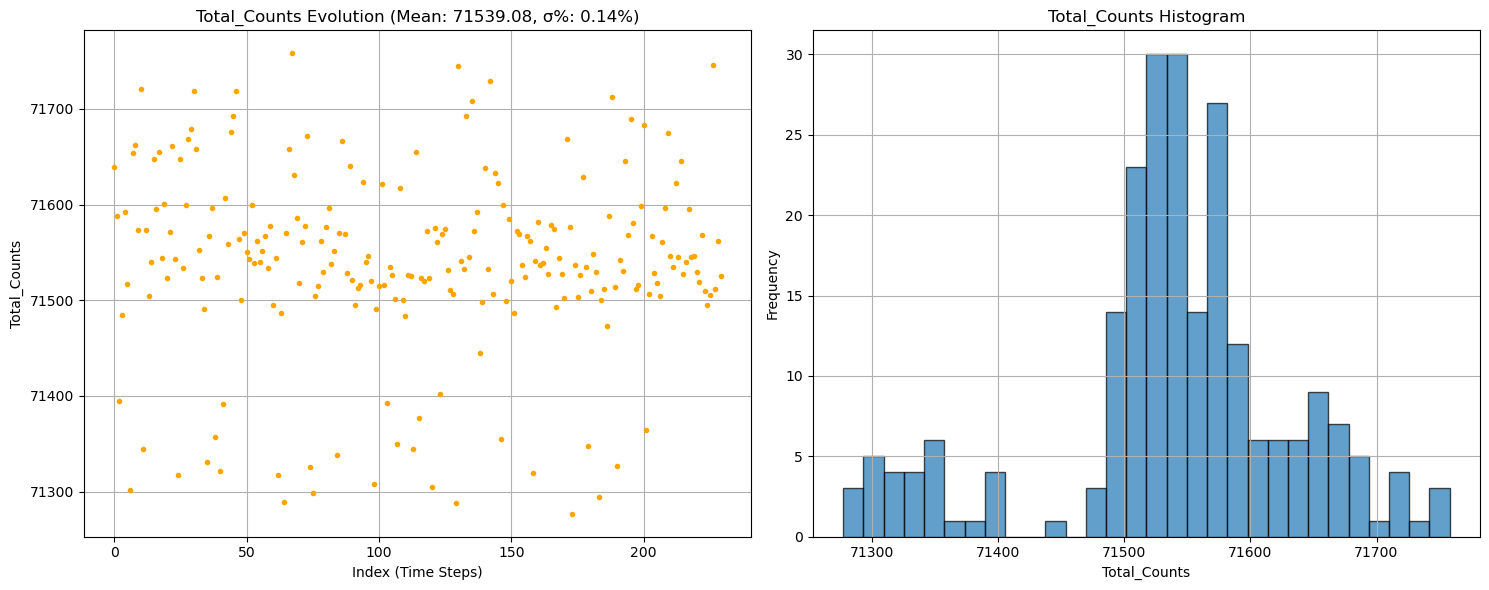


Analysis for file: ID_2_2.txt
Total_Sum:
  Mean: 96878541.33478262
  Standard Deviation (σ): 393566.7720611512
  Standard Deviation as Percentage of Mean: 0.4062476237138056%


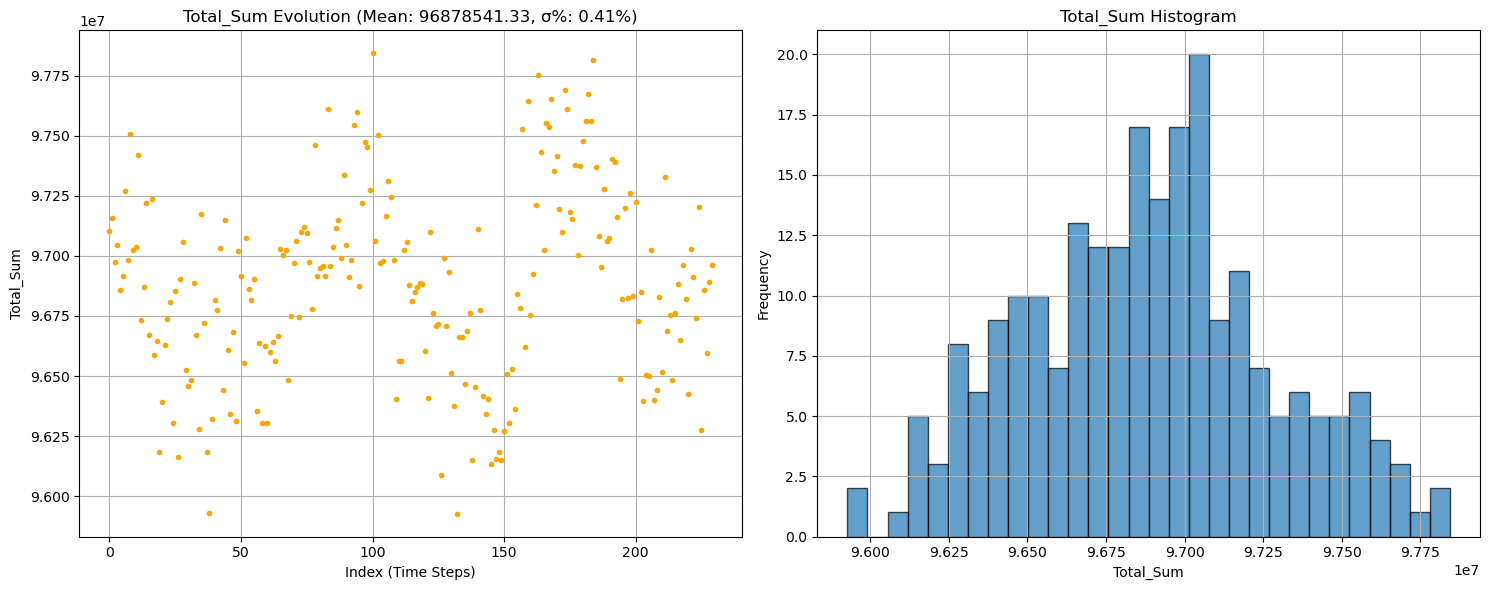

Total_Sqr:
  Mean: 131184897271.94348
  Standard Deviation (σ): 1012484952.8965042
  Standard Deviation as Percentage of Mean: 0.7717999357789216%


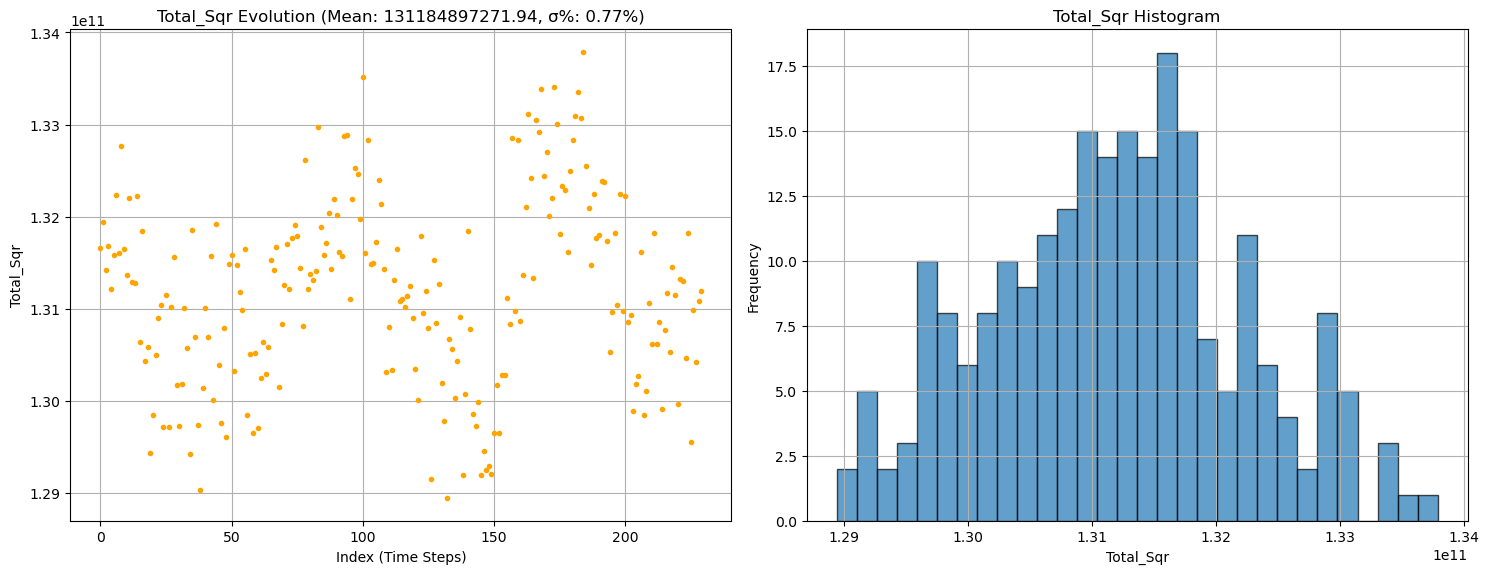

V_Mean:
  Mean: 0.26896705982608693
  Standard Deviation (σ): 0.0018047455293126124
  Standard Deviation as Percentage of Mean: 0.6709912843898259%


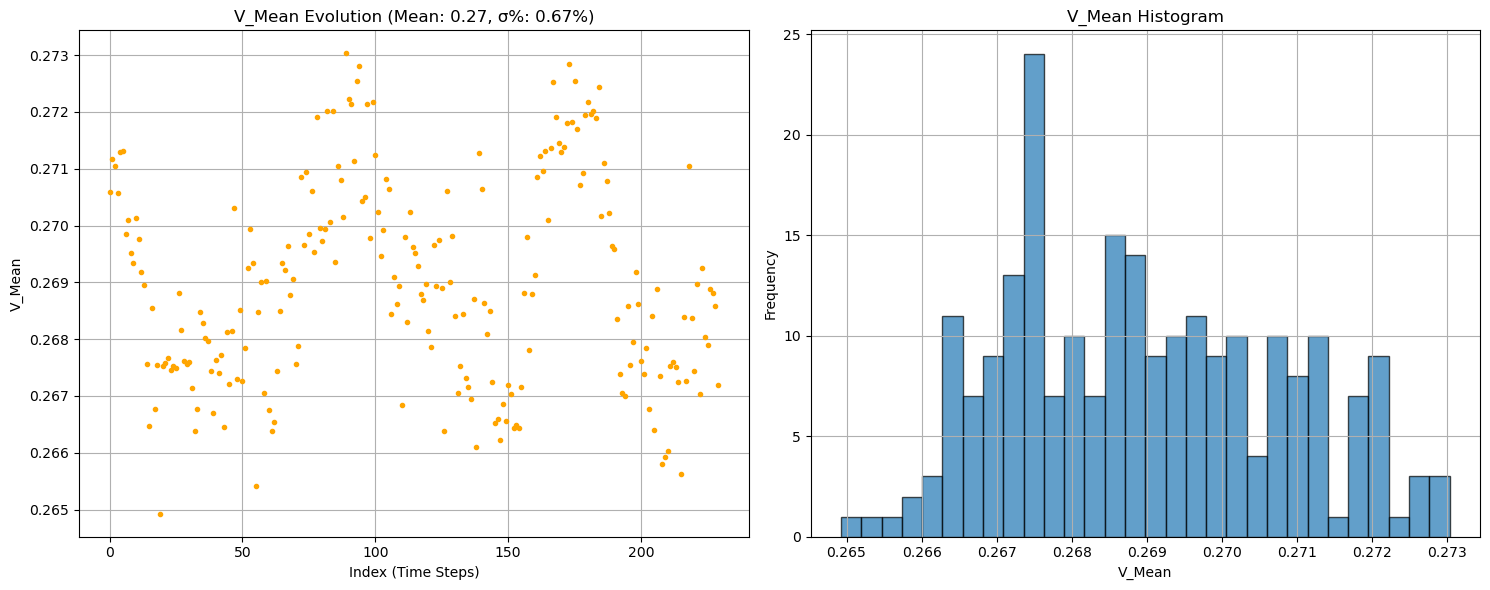

Std_V:
  Mean: 0.0018703831217391305
  Standard Deviation (σ): 0.0005914377407646682
  Standard Deviation as Percentage of Mean: 31.62120818406093%


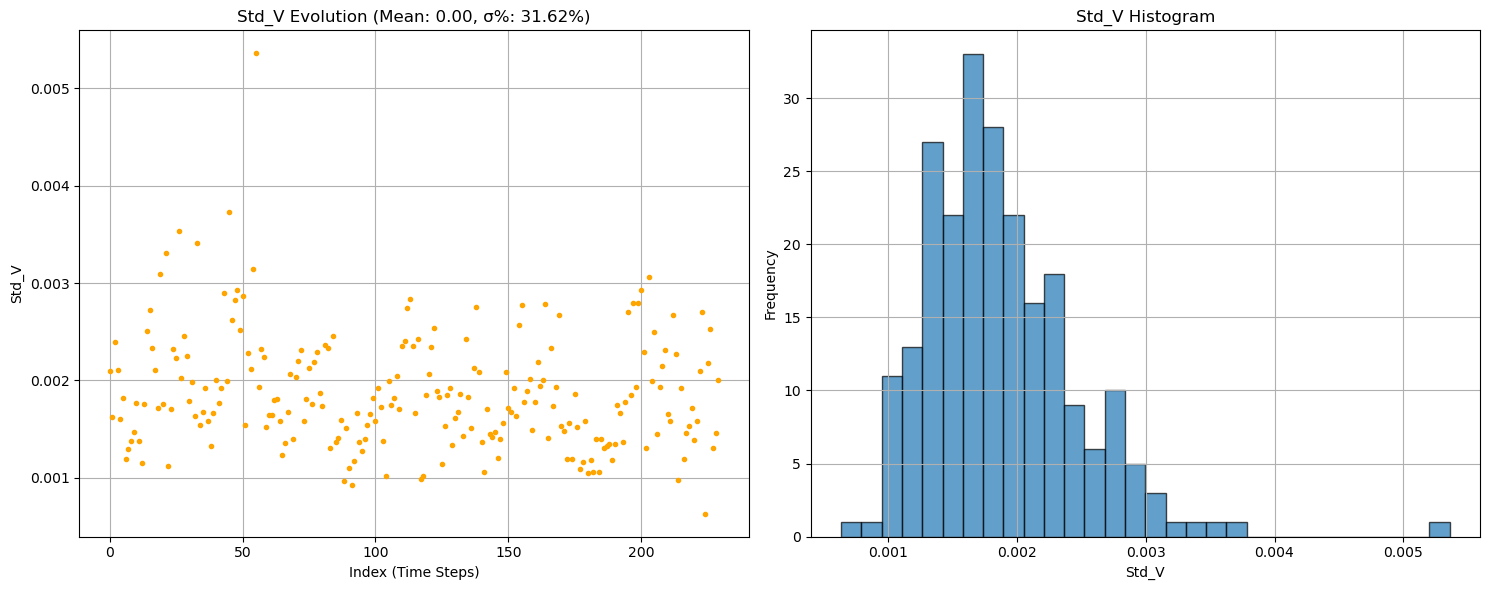

Total_Counts:
  Mean: 71547.49565217391
  Standard Deviation (σ): 100.87705984871519
  Standard Deviation as Percentage of Mean: 0.1409931387942998%


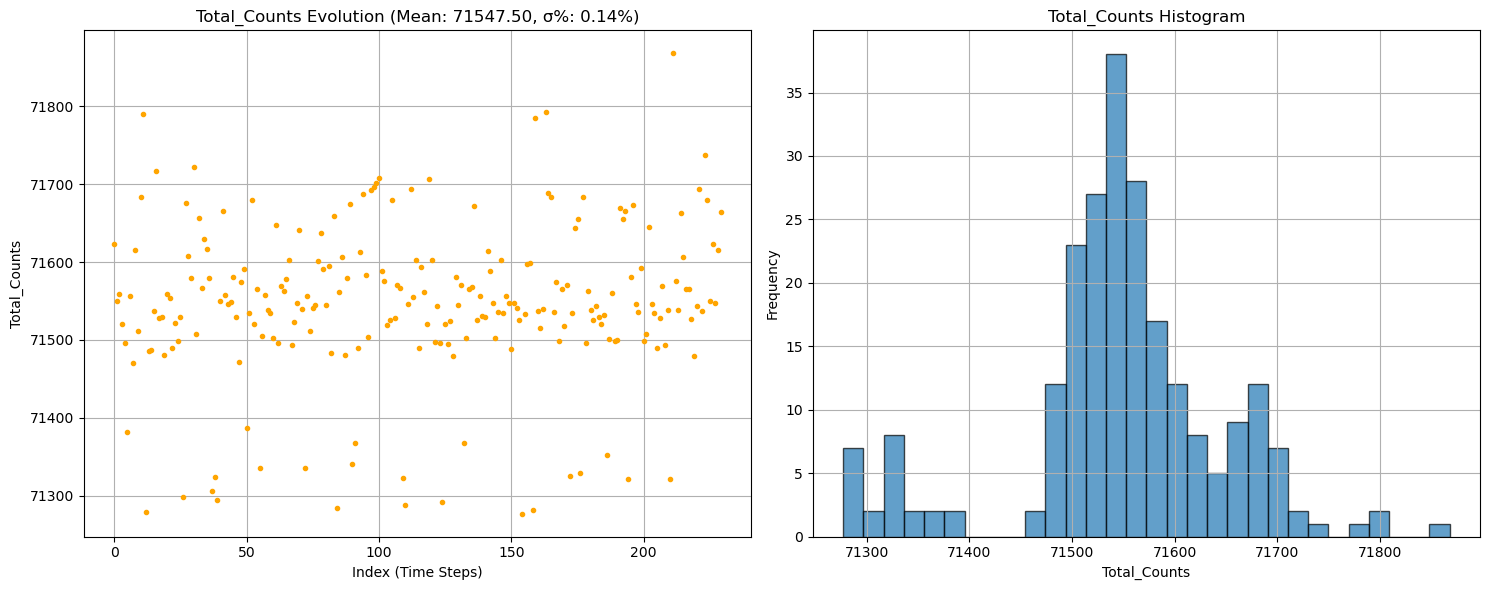


Analysis for file: ID_4_1.txt
Total_Sum:
  Mean: 240292106.06086957
  Standard Deviation (σ): 926038.6465008954
  Standard Deviation as Percentage of Mean: 0.38538038626467236%


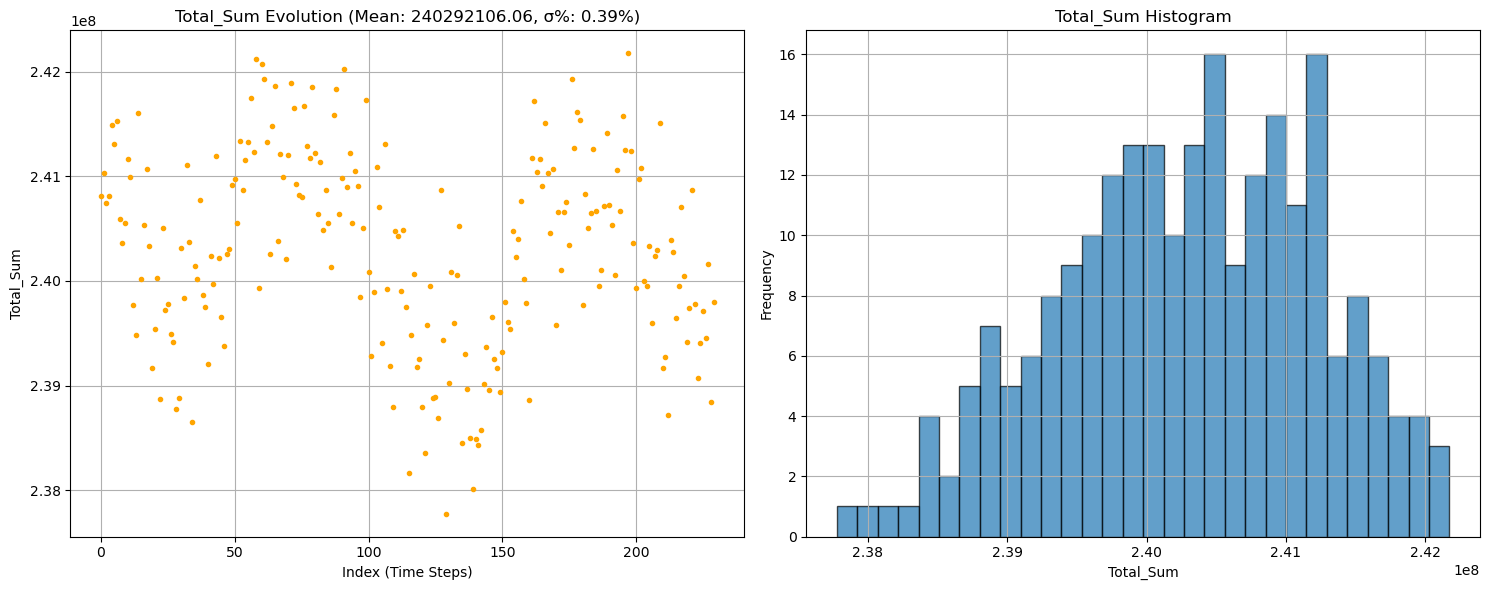

Total_Sqr:
  Mean: 806980817780.4521
  Standard Deviation (σ): 5915996770.165131
  Standard Deviation as Percentage of Mean: 0.7331025273235976%


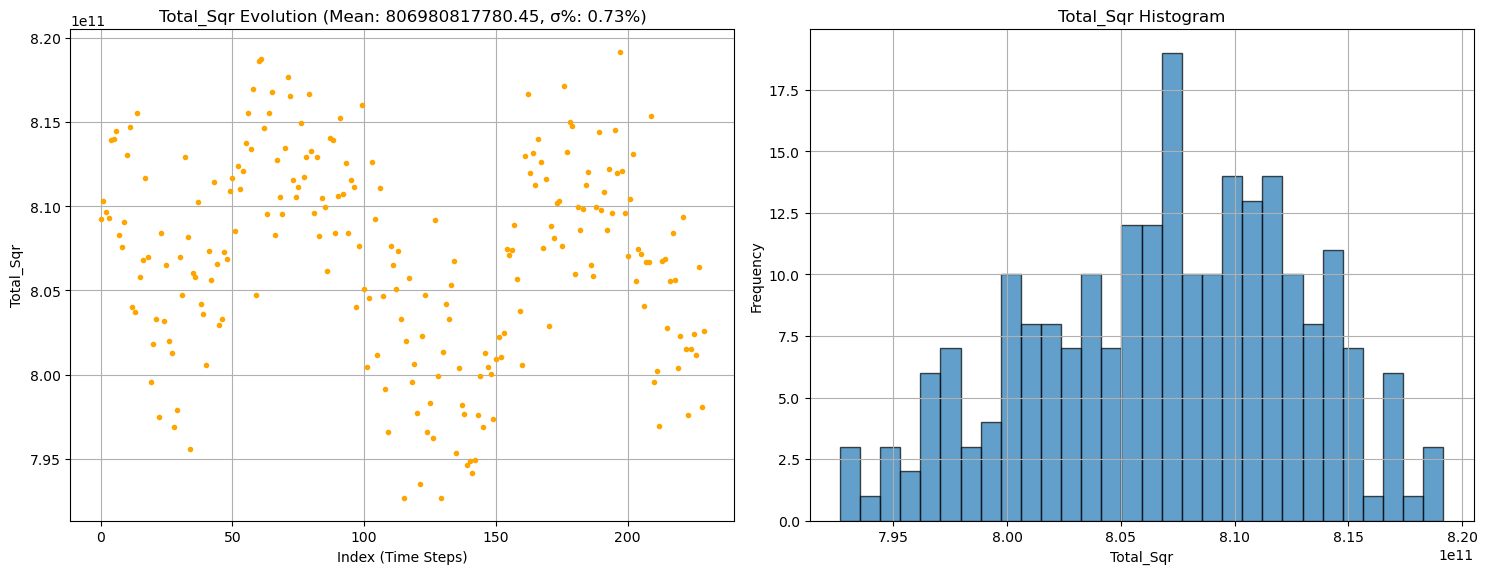

V_Mean:
  Mean: 0.26854899963043477
  Standard Deviation (σ): 0.0015055265784807152
  Standard Deviation as Percentage of Mean: 0.560615224987825%


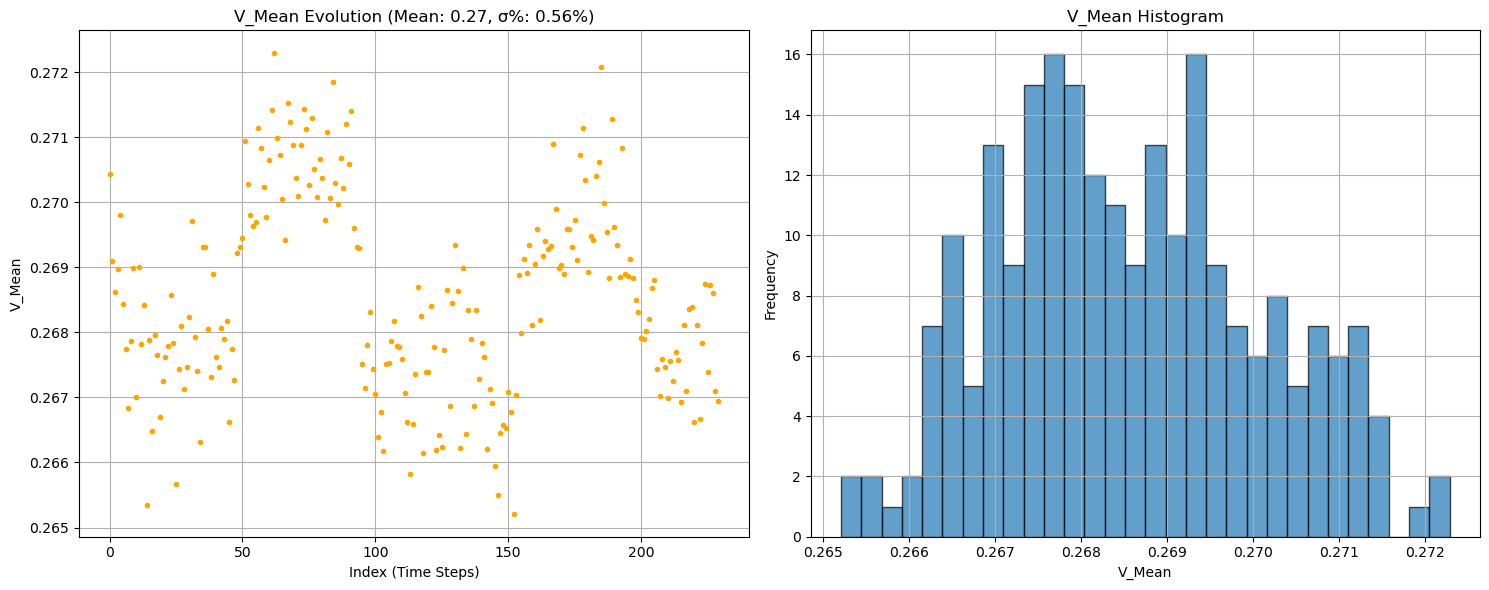

Std_V:
  Mean: 0.001767578704347826
  Standard Deviation (σ): 0.0006255060359728593
  Standard Deviation as Percentage of Mean: 35.387733198768586%


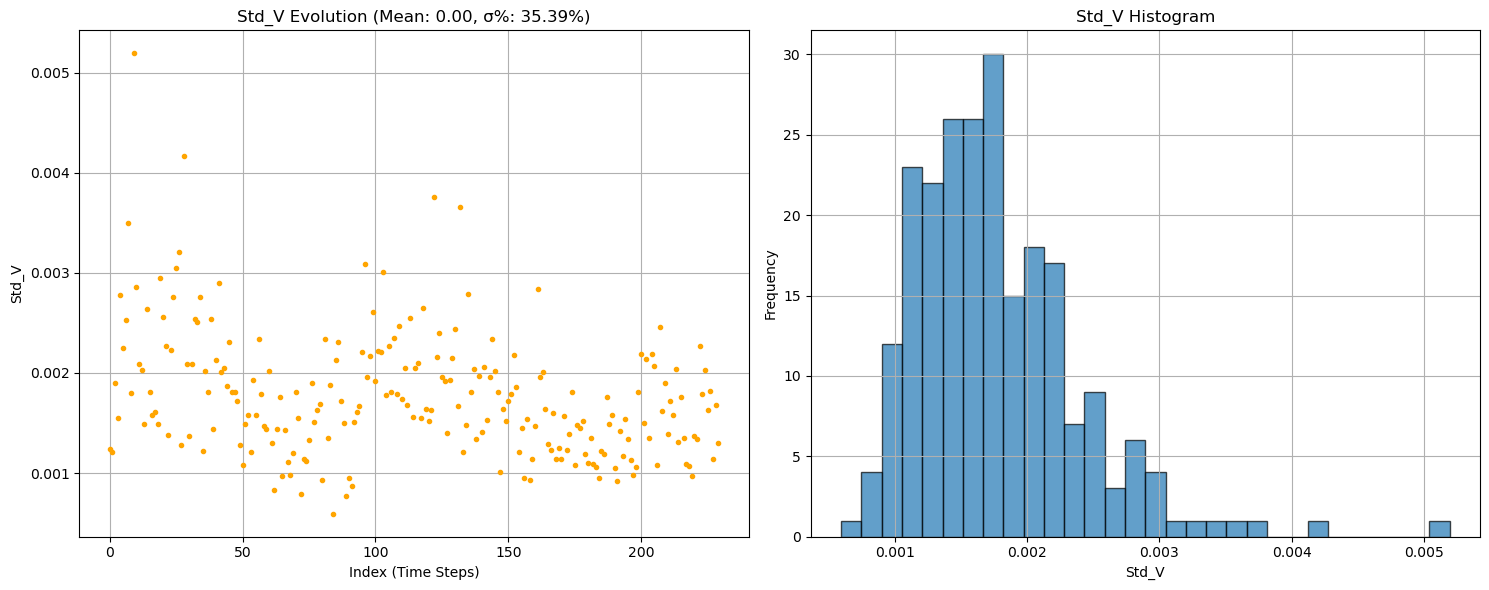

Total_Counts:
  Mean: 71554.43043478261
  Standard Deviation (σ): 100.42043466595865
  Standard Deviation as Percentage of Mean: 0.1403413234593288%


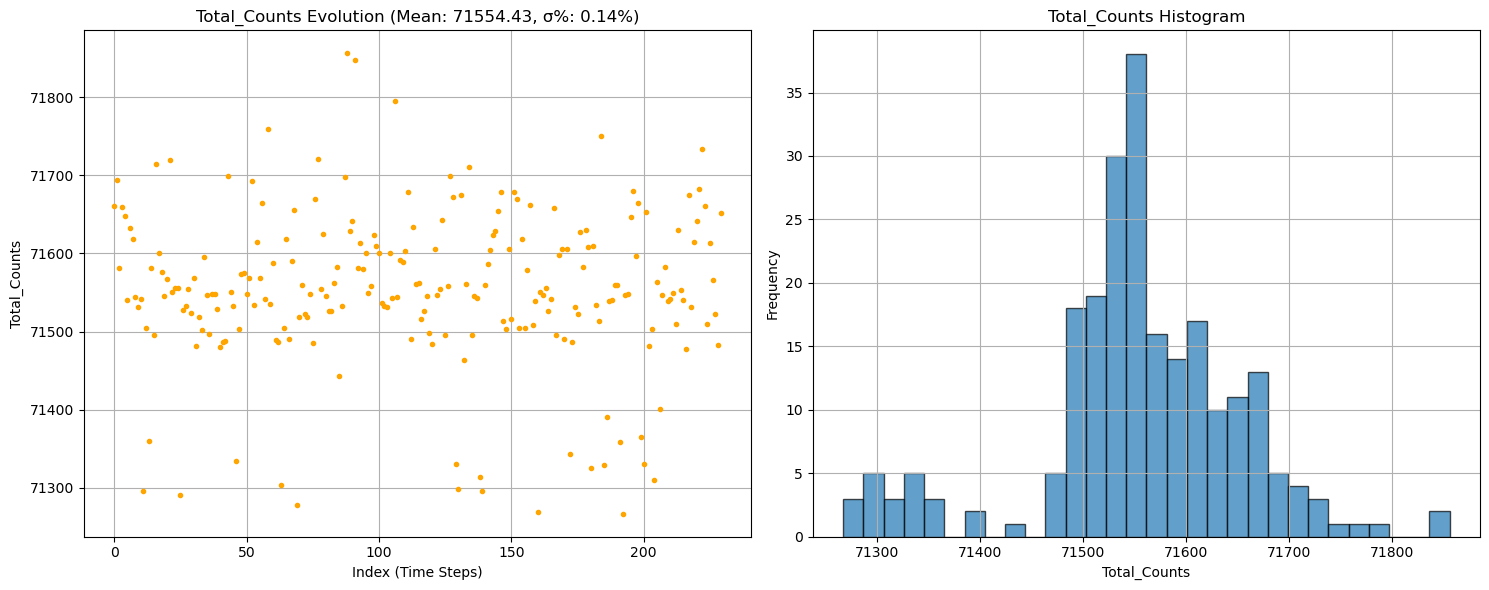


Analysis for file: ID_4_3.txt
Total_Sum:
  Mean: 240876281.97391304
  Standard Deviation (σ): 1422814.609773552
  Standard Deviation as Percentage of Mean: 0.5906827347690643%


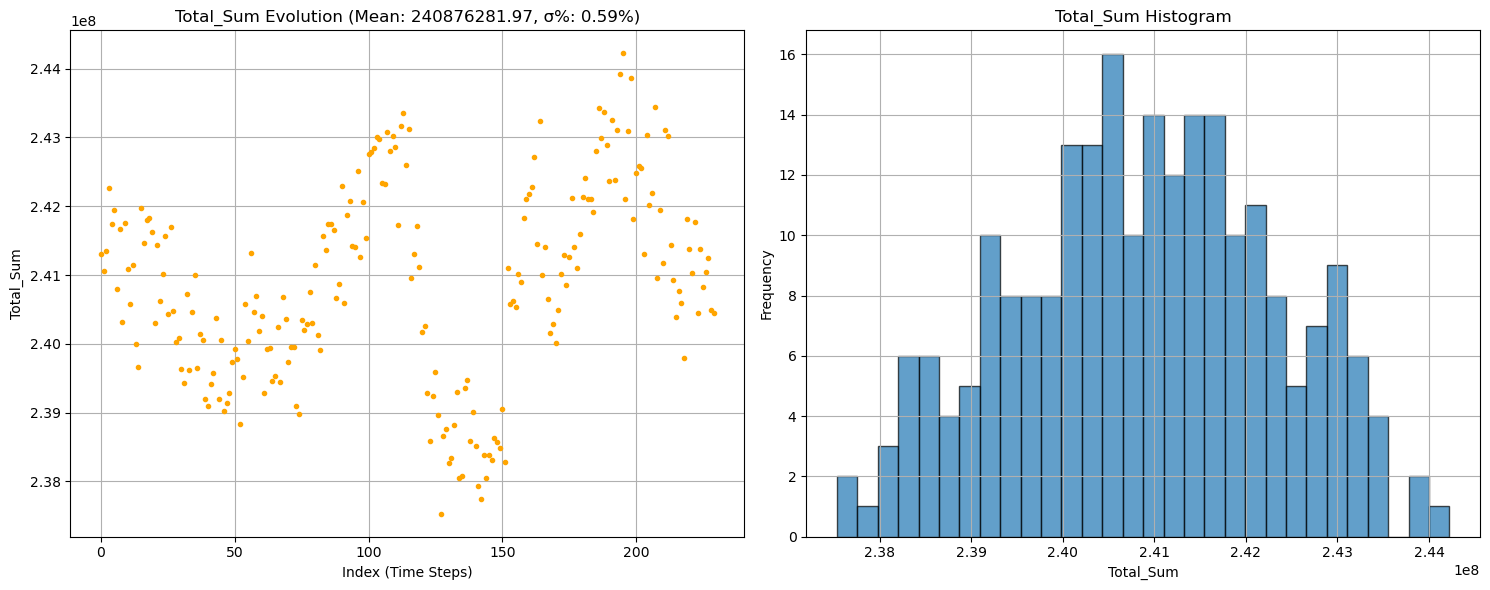

Total_Sqr:
  Mean: 810972264406.4869
  Standard Deviation (σ): 9291117952.64438
  Standard Deviation as Percentage of Mean: 1.1456764134152133%


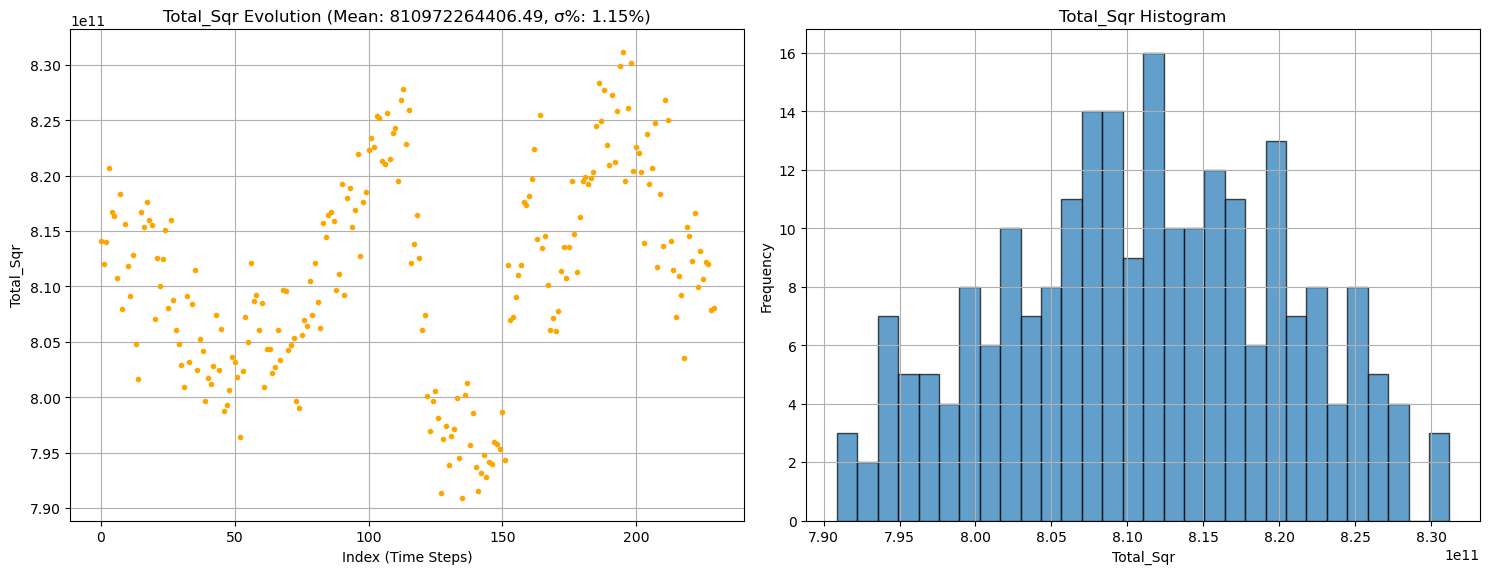

V_Mean:
  Mean: 0.26790964343478263
  Standard Deviation (σ): 0.001718789103600591
  Standard Deviation as Percentage of Mean: 0.6415555190789527%


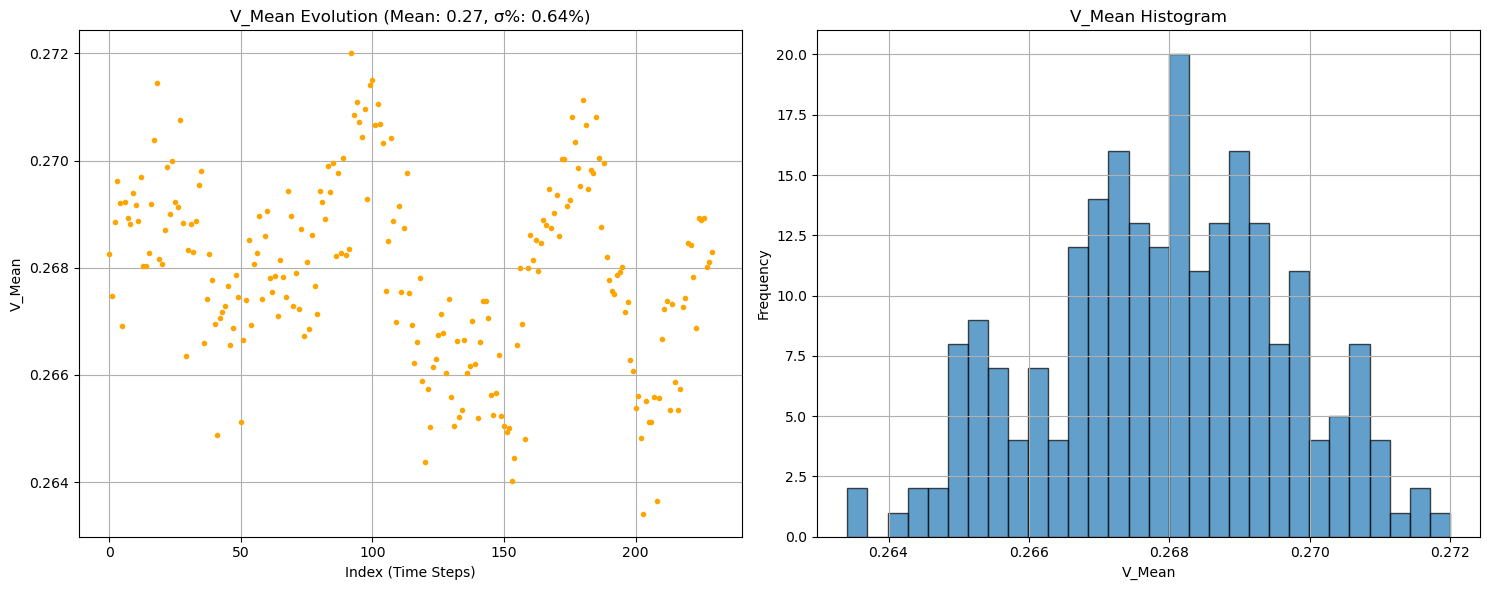

Std_V:
  Mean: 0.0021007933217391302
  Standard Deviation (σ): 0.0007006600380841101
  Standard Deviation as Percentage of Mean: 33.352164195955865%


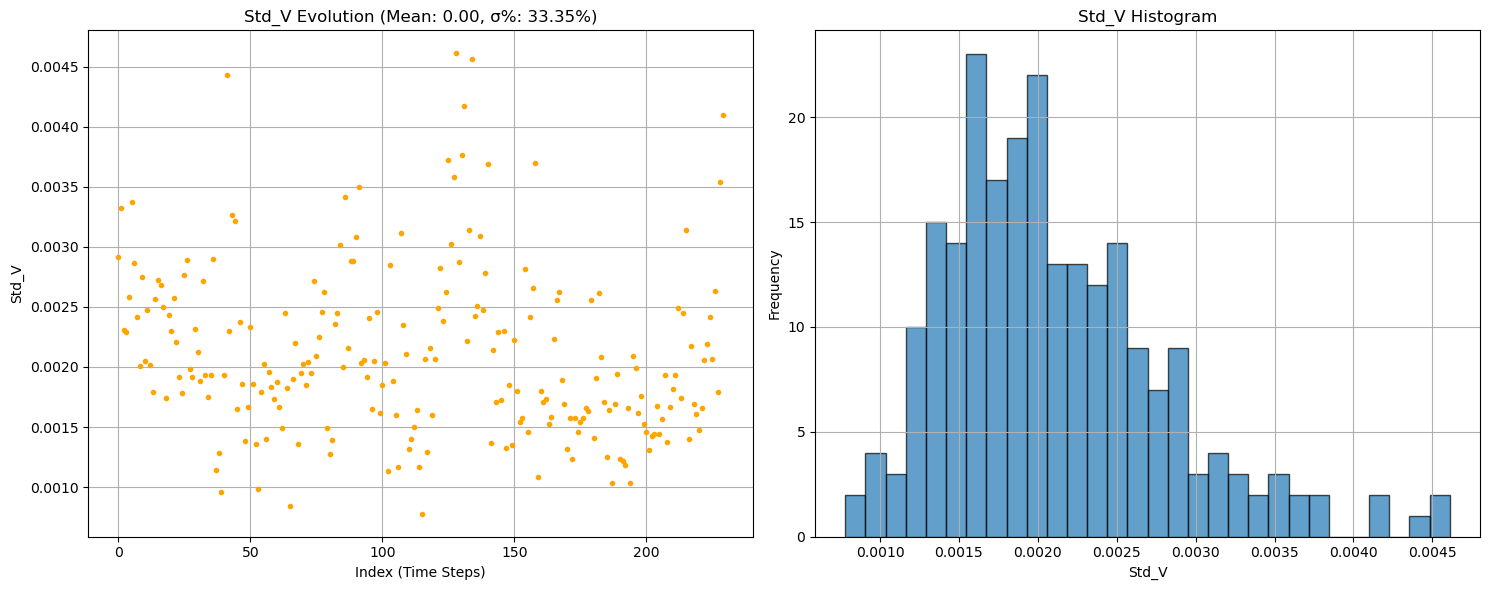

Total_Counts:
  Mean: 71549.78260869565
  Standard Deviation (σ): 94.39943773504888
  Standard Deviation as Percentage of Mean: 0.1319353243200158%


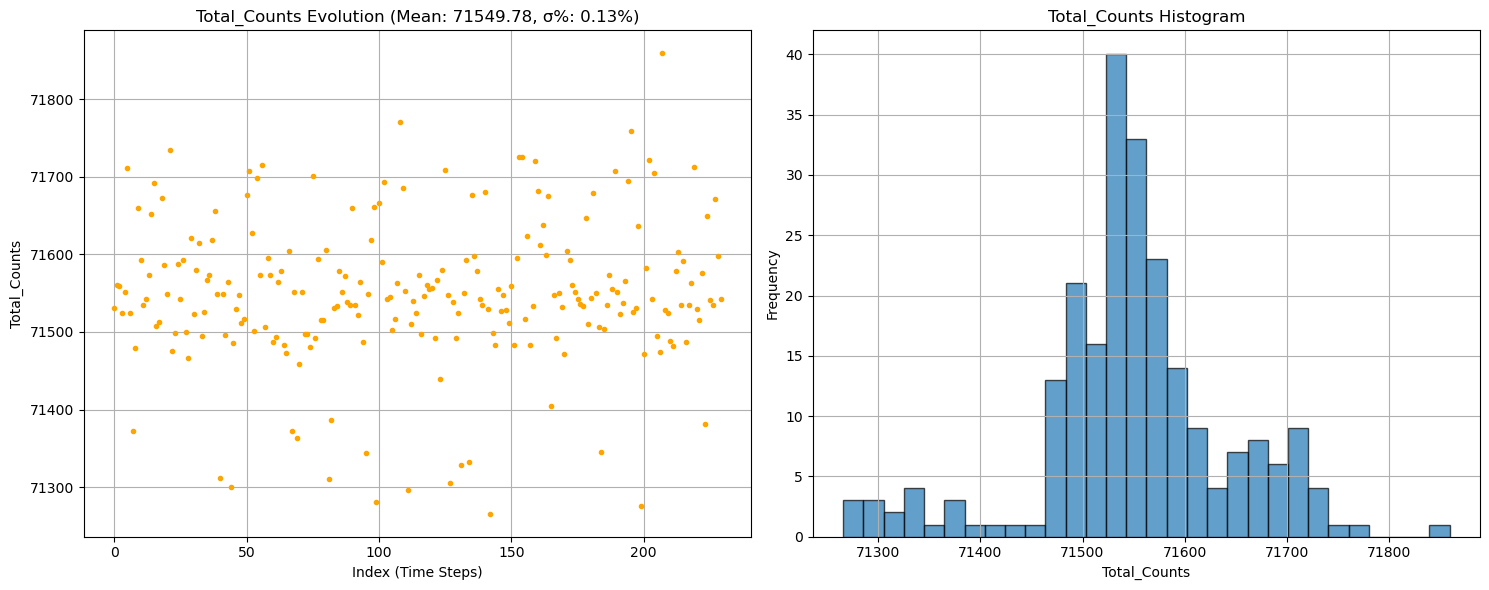

In [13]:
# List of columns to analyze and plot
columns_to_plot = ['Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Total_Counts']

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date-Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        
        print(f'\nAnalysis for file: {file_name}')
        
        # Loop through each column, calculate mean and standard deviation, and plot both the histogram and line plot
        for column in columns_to_plot:
            # Calculate mean and standard deviation (sigma)
            mean_value = df[column].mean()
            std_dev = df[column].std()  # Standard deviation
            
            # Calculate sigma as a percentage of the mean
            sigma_percentage = (std_dev / mean_value) * 100 if mean_value != 0 else 0
            
            # Print mean and sigma (standard deviation)
            print(f'{column}:')
            print(f'  Mean: {mean_value}')
            print(f'  Standard Deviation (σ): {std_dev}')
            print(f'  Standard Deviation as Percentage of Mean: {sigma_percentage}%')
            
            # Create a subplot with 2 plots side by side (1 row, 2 columns)
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size as necessary

            # Plot the evolution of values (line plot) on the left
            axs[0].plot(df[column], '.',color='orange')
            axs[0].set_title(f'{column} Evolution (Mean: {mean_value:.2f}, σ%: {sigma_percentage:.2f}%)')
            axs[0].set_xlabel('Index (Time Steps)')
            axs[0].set_ylabel(column)
            axs[0].grid(True)

            # Plot the histogram on the right
            axs[1].hist(df[column], bins=30, edgecolor='black', alpha=0.7)
            axs[1].set_title(f'{column} Histogram')
            axs[1].set_xlabel(column)
            axs[1].set_ylabel('Frequency')
            axs[1].grid(True)

            # Adjust the layout to prevent overlapping
            plt.tight_layout()
            
            # Show the combined plots
            plt.show()


## MEAN AND SIGMA OF EACH OF THE DATASETS, PLOT TOGETHER. 

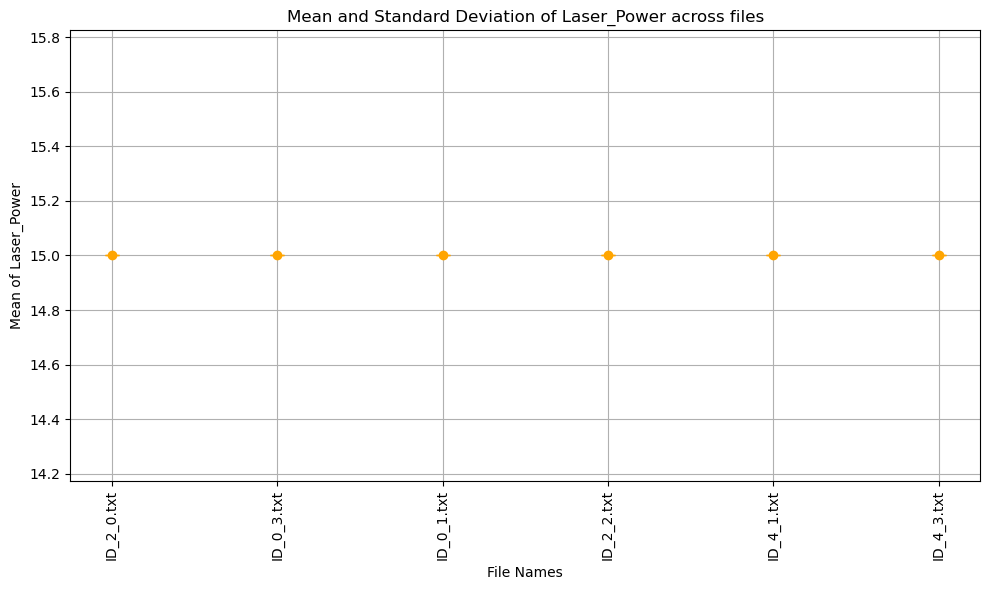

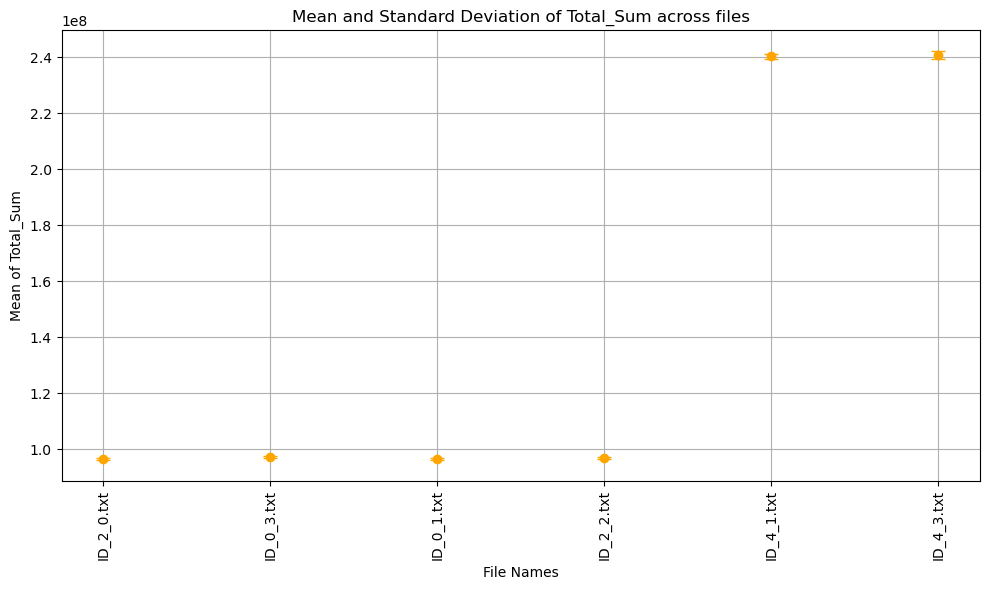

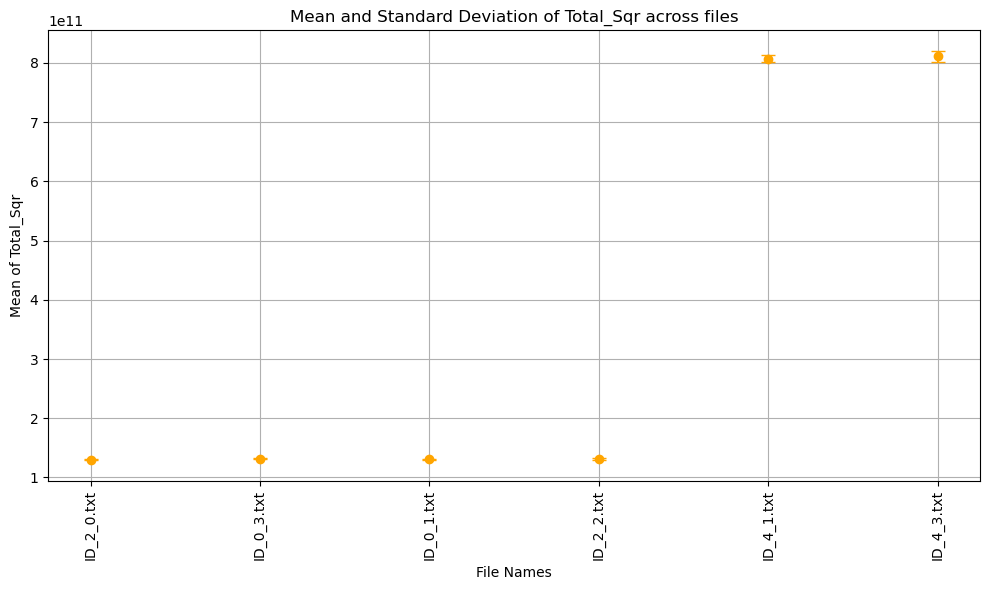

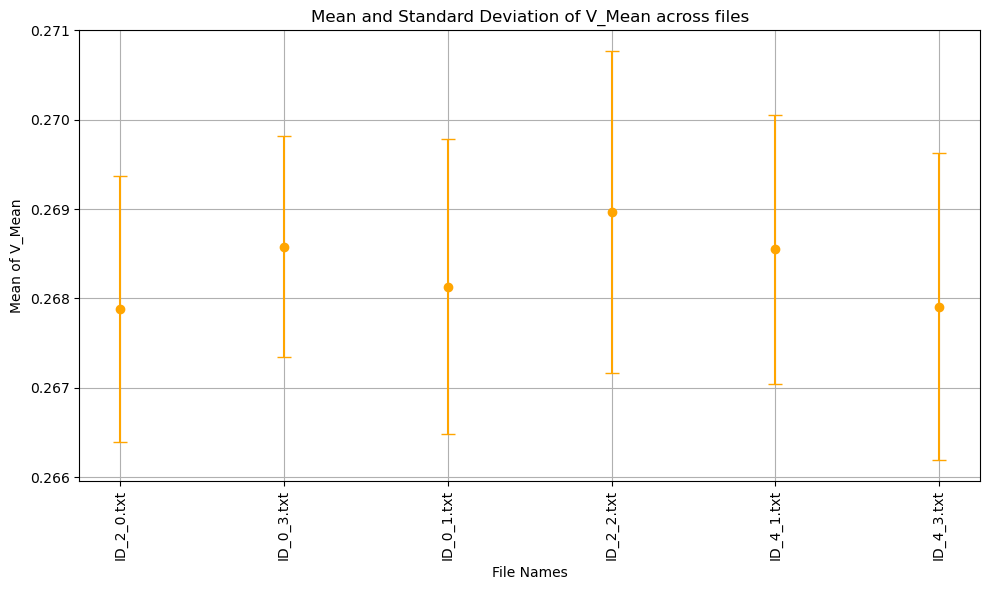

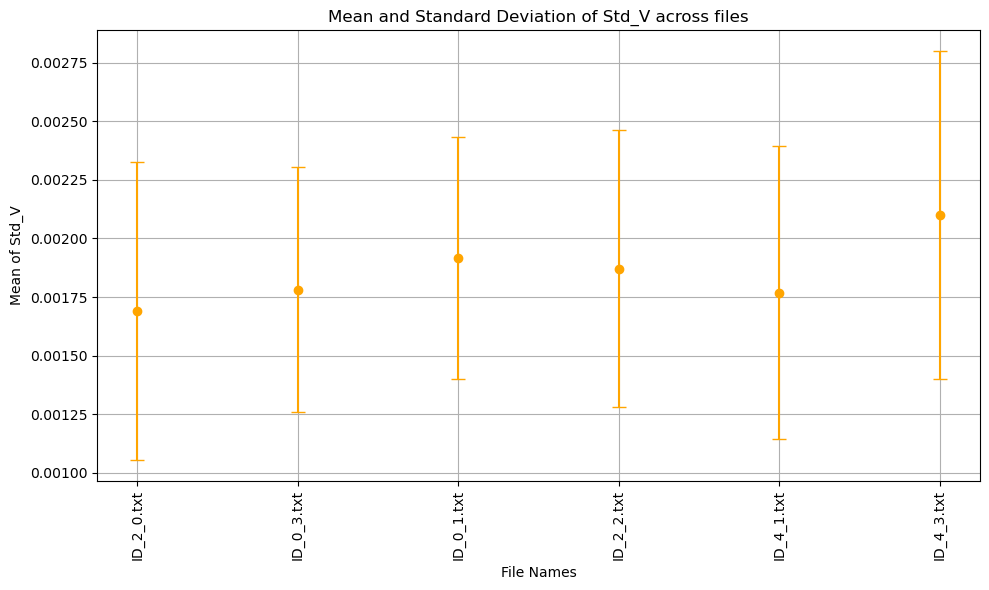

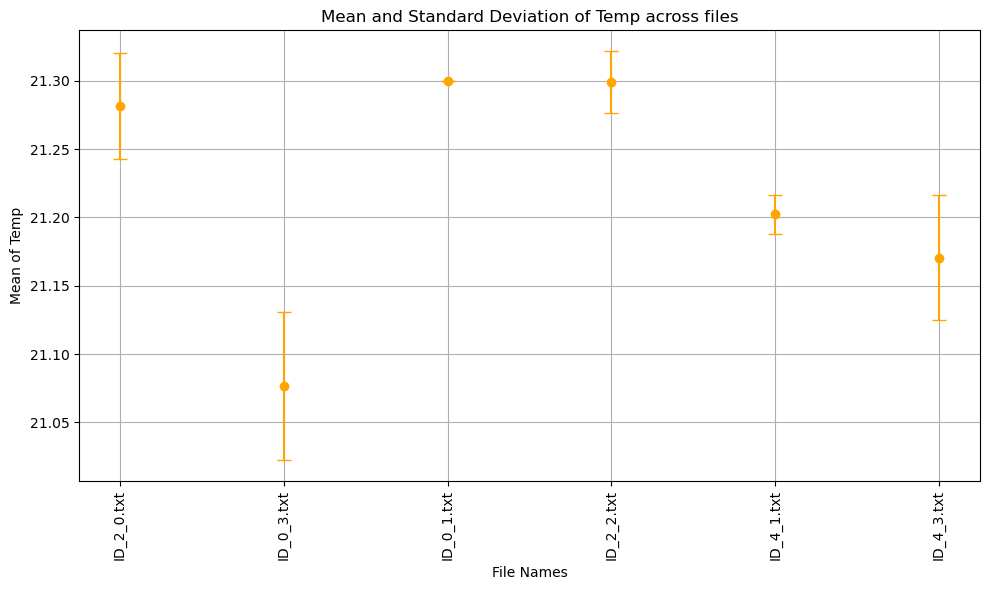

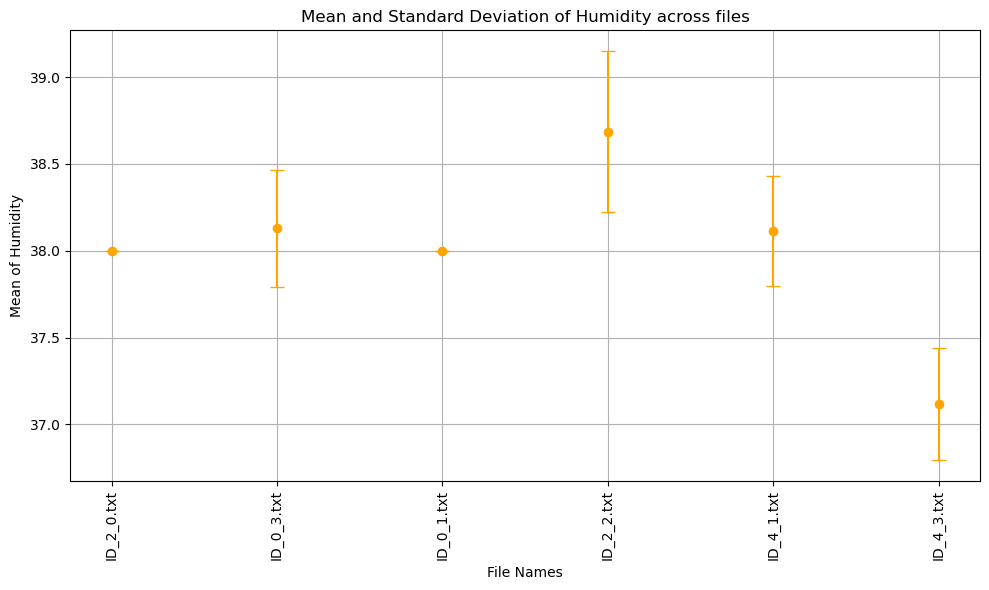

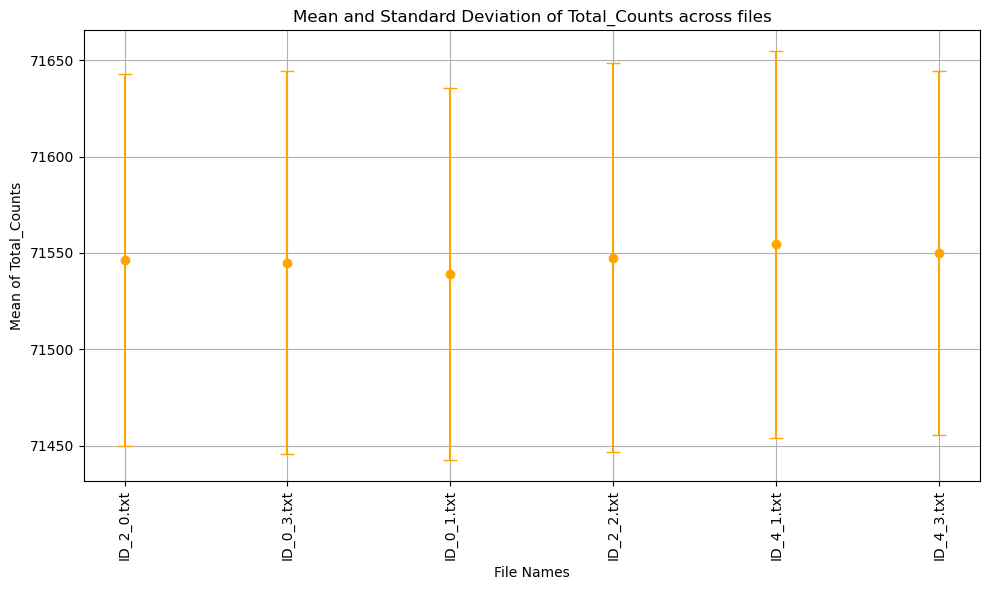

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# List of columns to analyze and plot
columns_to_analyze = ['Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']

# Dictionary to store the mean and standard deviation for each file
mean_dict = {col: [] for col in columns_to_analyze}
std_dev_dict = {col: [] for col in columns_to_analyze}
file_names = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        
        # Append the filename for the x-axis
        file_names.append(file_name)
        
        # Calculate the mean and standard deviation for each column and store them
        for column in columns_to_analyze:
            mean_value = df[column].mean()
            std_dev_value = df[column].std()  # Standard deviation
            
            # Append the mean and standard deviation to the corresponding list
            mean_dict[column].append(mean_value)
            std_dev_dict[column].append(std_dev_value)
# Now plot the means with standard deviation as error bars for each column across all files
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    
    # Plot Mean values with standard deviation as error bars (no connecting lines)
    plt.errorbar(file_names, mean_dict[column], color= 'orange',yerr=std_dev_dict[column], fmt='o', capsize=5, label='Mean ± σ')
    
    # Add title and labels
    plt.title(f'Mean and Standard Deviation of {column} across files')
    plt.xlabel('File Names')
    plt.ylabel(f'Mean of {column}')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()